<a href="https://colab.research.google.com/github/justme088/lab-termodinamica/blob/main/WIP_Laboratorio2_Termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte A

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.ndimage import uniform_filter1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import stats

In [133]:
def recortar_dataframe(df1, df2):
    # Determinar la longitud mínima entre df1 y df2
    longitud_minima = min(len(df1), len(df2))

    # Recortar df1 para que tenga la misma longitud que df2
    df1_recortado = df1.head(longitud_minima)

    return df1_recortado

def dataframe_mas_corto(array_dataframes):
    longitud_mas_corta = float('inf')  # Inicializar con un valor grande
    dataframe_mas_corto = None

    # Iterar sobre cada DataFrame en el array
    for df in array_dataframes:
        longitud_actual = len(df)
        if longitud_actual < longitud_mas_corta:
            longitud_mas_corta = longitud_actual
            dataframe_mas_corto = df

    return dataframe_mas_corto

def interpolacion_polinomica(x,y,n=3):
  coeffs = np.polyfit(x, y, n)
  poly = np.poly1d(coeffs)
  x_new = np.linspace(x.min(), x.max(), 100)
  return [x_new, poly(x_new)]

def calcular_R2(y_observado, y_ajustado):
    ss_res = np.sum((y_observado - y_ajustado) ** 2)
    ss_tot = np.sum((y_observado - np.mean(y_observado)) ** 2)
    return 1 - (ss_res / ss_tot)

## **Agua destilada, comparación de valores obtenidos entre ambas termocuplas**

In [4]:
f1 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep1/temp1_agua_destilada.csv'
f2 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep2/temp1_agua_destilada.csv'
f3 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep3/temp1_agua_destilada.csv'

d1 = pd.read_csv(f1)
d2 = pd.read_csv(f2)
d3 = pd.read_csv(f3)

Diferencias promedios:
· repetición 1 con repetición 3: 0.14 ºC
· repetición 2 con repetición 1: 1.31 ºC
· repetición 2 con repetición 3: 1.45 ºC



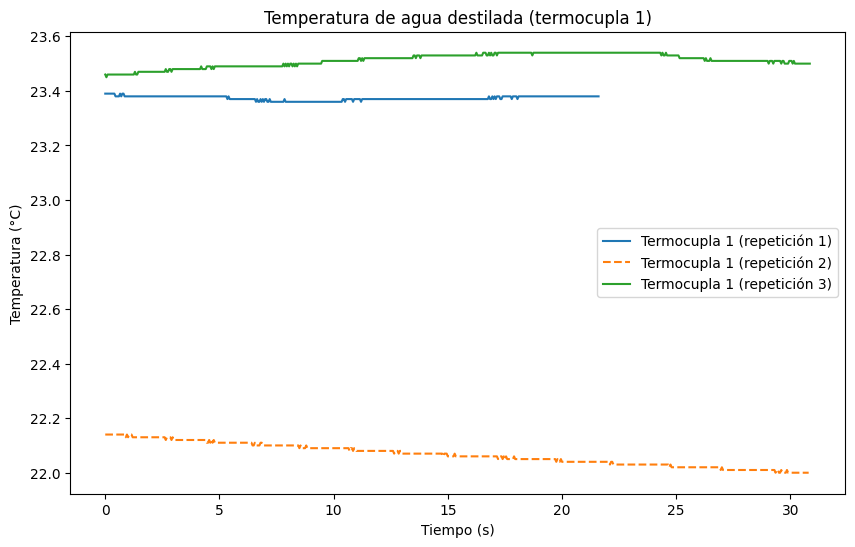

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(d1['Tiempo'], d1['Termocupla_1'], label='Termocupla 1 (repetición 1)')
plt.plot(d2['Tiempo'], d2['Termocupla_1'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d3['Tiempo'], d3['Termocupla_1'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de agua destilada (termocupla 1)')
plt.legend()

print("Diferencias promedios:")
dif_d1_d3 = round(abs(np.mean([d1['Termocupla_1']]) - np.mean([d3['Termocupla_1']])),2)
print('· repetición 1 con repetición 3: '+str(dif_d1_d3)+' ºC')

dif_d2_d1 = round(abs(np.mean([d2['Termocupla_1']]) - np.mean([d1['Termocupla_1']])),2)
dif_d2_d3 = round(abs(np.mean([d2['Termocupla_1']]) - np.mean([d3['Termocupla_1']])),2)
print('· repetición 2 con repetición 1: '+str(dif_d2_d1)+' ºC')
print('· repetición 2 con repetición 3: '+str(dif_d2_d3)+' ºC'+'\n')

plt.show()


Análisis de varianza (ANOVA)

Estadístico F: 453828.38315486786
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.



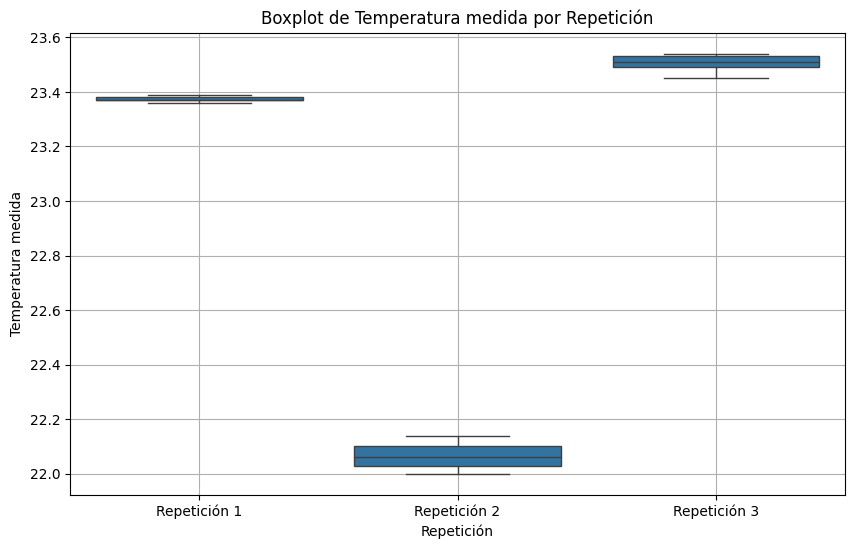

In [6]:
df = pd.DataFrame({
    'Grupo': ['Repetición 1'] * len(d1['Termocupla_1']) + ['Repetición 2'] * len(d2['Termocupla_1']) + ['Repetición 3'] * len(d3['Termocupla_1']),
    'Termocupla_1': pd.concat([d1['Termocupla_1'], d2['Termocupla_1'], d3['Termocupla_1']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocupla_1', data=df)
plt.title('Boxplot de Temperatura medida por Repetición')
plt.xlabel('Repetición')
plt.ylabel('Temperatura medida')
plt.grid(True)

# Aplicar ANOVA
statistic, p_value = f_oneway(d1['Termocupla_1'], d2['Termocupla_1'], d3['Termocupla_1'])

# Mostrar resultados
print('Análisis de varianza (ANOVA)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

Diferencias promedios:
· repetición 1 con repetición 3: 0.61 ºC
· repetición 2 con repetición 1: 2.11 ºC
· repetición 2 con repetición 3: 1.49 ºC



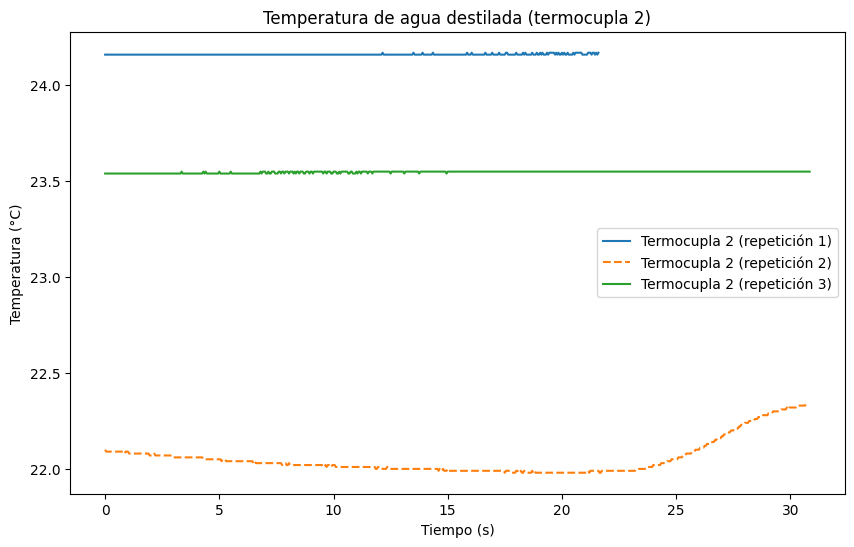

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(d1['Tiempo'], d1['Termocupla_2'], label='Termocupla 2 (repetición 1)')
plt.plot(d2['Tiempo'], d2['Termocupla_2'], label='Termocupla 2 (repetición 2)', linestyle='dashed')
plt.plot(d3['Tiempo'], d3['Termocupla_2'], label='Termocupla 2 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de agua destilada (termocupla 2)')
plt.legend()

print("Diferencias promedios:")
dif_d1_d3 = round(abs(np.mean([d1['Termocupla_2']]) - np.mean([d3['Termocupla_2']])),2)
print('· repetición 1 con repetición 3: '+str(dif_d1_d3)+' ºC')

dif_d2_d1 = round(abs(np.mean([d2['Termocupla_2']]) - np.mean([d1['Termocupla_2']])),2)
dif_d2_d3 = round(abs(np.mean([d2['Termocupla_2']]) - np.mean([d3['Termocupla_2']])),2)
print('· repetición 2 con repetición 1: '+str(dif_d2_d1)+' ºC')
print('· repetición 2 con repetición 3: '+str(dif_d2_d3)+' ºC'+'\n')

plt.show()

Análisis de varianza (ANOVA)

Estadístico F: 206652.5355699398
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.



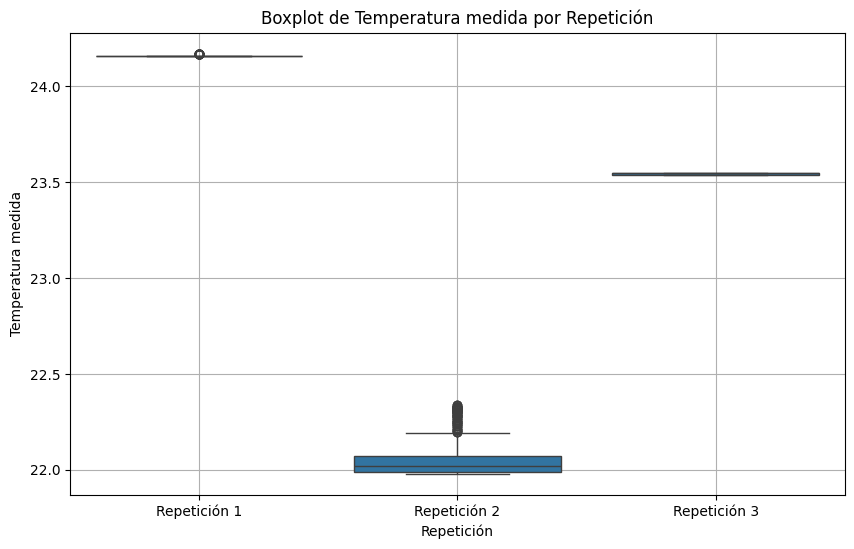

In [8]:
df = pd.DataFrame({
    'Grupo': ['Repetición 1'] * len(d1['Termocupla_2']) + ['Repetición 2'] * len(d2['Termocupla_2']) + ['Repetición 3'] * len(d3['Termocupla_2']),
    'Termocupla_2': pd.concat([d1['Termocupla_2'], d2['Termocupla_2'], d3['Termocupla_2']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocupla_2', data=df)
plt.title('Boxplot de Temperatura medida por Repetición')
plt.xlabel('Repetición')
plt.ylabel('Temperatura medida')
plt.grid(True)


# Aplicar ANOVA
statistic, p_value = f_oneway(d1['Termocupla_2'], d2['Termocupla_2'], d3['Termocupla_2'])

# Mostrar resultados
print('Análisis de varianza (ANOVA)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

## **Hielo, mediciones en los calorímetros**

In [84]:
# Termocupla 1 - Calorimetro de laboratorio
f4 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep1/temp2_hielo_calorimetro_serio_termocupla1.csv'
f5 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep2/temp2_hielo_calorimetro_serio_termocupla1.csv'
f6 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep3/temp2_hielo_calorimetro_serio_termocupla1.csv'
d4 = pd.read_csv(f4)
d5 = pd.read_csv(f5)
d6 = pd.read_csv(f6)

# Termocupla 2 - Calorimetro casero
f7 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep1/temp3_hielo_calorimetro_casero_termocupla2.csv'
f8 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep2/temp3_hielo_calorimetro_casero_termocupla2.csv'
f9 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep3/temp3_hielo_calorimetro_casero_termocupla2.csv'
d7 = pd.read_csv(f7)
d8 = pd.read_csv(f8)
d9 = pd.read_csv(f9)

### Calorímetro de laboratorio, termocupla 1

Diferencias promedios:
· repetición 1 con repetición 2: 0.17 ºC
· repetición 1 con repetición 3: 5.29 ºC
· repetición 2 con repetición 3: 5.46 ºC



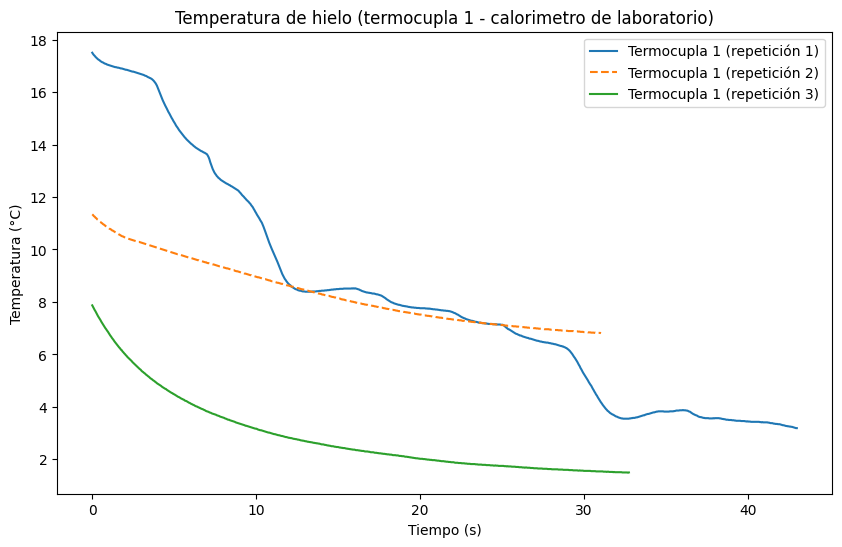

In [39]:
# Calorimetro de laboratorio
plt.figure(figsize=(10, 6))
plt.plot(d4['Tiempo'], d4['Termocupla_1'], label='Termocupla 1 (repetición 1)')
plt.plot(d5['Tiempo'], d5['Termocupla_1'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d6['Tiempo'], d6['Termocupla_1'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de hielo (termocupla 1 - calorimetro de laboratorio)')
plt.legend()

print("Diferencias promedios:")
dif_d4_d5 = round(abs(np.mean([d4['Termocupla_1']]) - np.mean([d5['Termocupla_1']])),2)
dif_d4_d6 = round(abs(np.mean([d4['Termocupla_1']]) - np.mean([d6['Termocupla_1']])),2)
print('· repetición 1 con repetición 2: '+str(dif_d4_d5)+' ºC')
print('· repetición 1 con repetición 3: '+str(dif_d4_d6)+' ºC')

dif_d5_d6 = round(abs(np.mean([d5['Termocupla_1']]) - np.mean([d6['Termocupla_1']])),2)
print('· repetición 2 con repetición 3: '+str(dif_d5_d6)+' ºC'+'\n')

plt.show()

Tasa de enfriamiento promedio del Calorímetro 1: -0.3327906976744183 °C/s
Tasa de enfriamiento promedio del Calorímetro 2: -0.14516129032258068 °C/s
Tasa de enfriamiento promedio del Calorímetro 3: -0.1929663608562691 °C/s



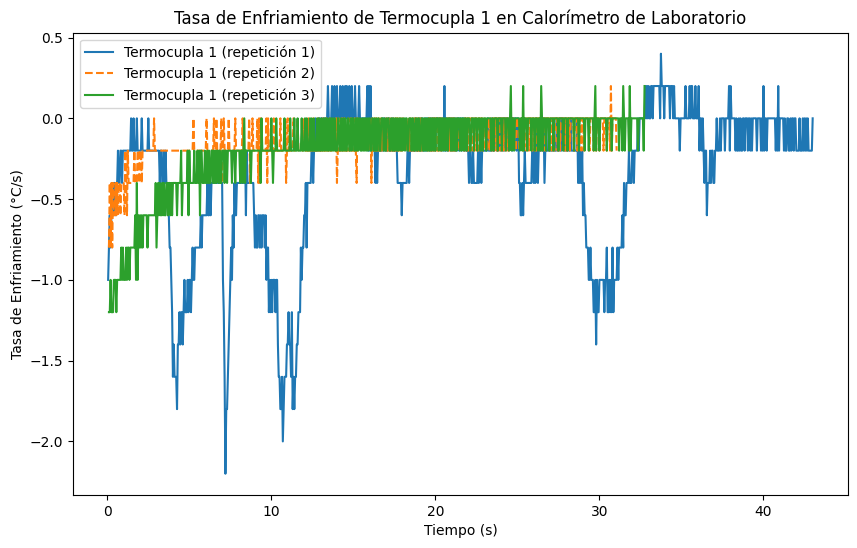

In [188]:
# Calorimetro de laboratorio

d4['tasa_enfriamiento_1'] = d4['Termocupla_1'].diff()/d4['Tiempo'].diff()
d5['tasa_enfriamiento_2'] = d5['Termocupla_1'].diff()/d5['Tiempo'].diff()
d6['tasa_enfriamiento_3'] = d6['Termocupla_1'].diff()/d6['Tiempo'].diff()

plt.figure(figsize=(10, 6))
plt.plot(d4['Tiempo'], d4['tasa_enfriamiento_1'], label='Termocupla 1 (repetición 1)')
plt.plot(d5['Tiempo'], d5['tasa_enfriamiento_2'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d6['Tiempo'], d6['tasa_enfriamiento_3'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento de Termocupla 1 en Calorímetro de Laboratorio')
plt.legend()

tasa_promedio_1 = d4['tasa_enfriamiento_1'].mean()
tasa_promedio_2 = d5['tasa_enfriamiento_2'].mean()
tasa_promedio_3 = d6['tasa_enfriamiento_3'].mean()

print(f'Tasa de enfriamiento promedio del Calorímetro 1: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro 2: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro 3: {tasa_promedio_3} °C/s'+'\n')

plt.show()

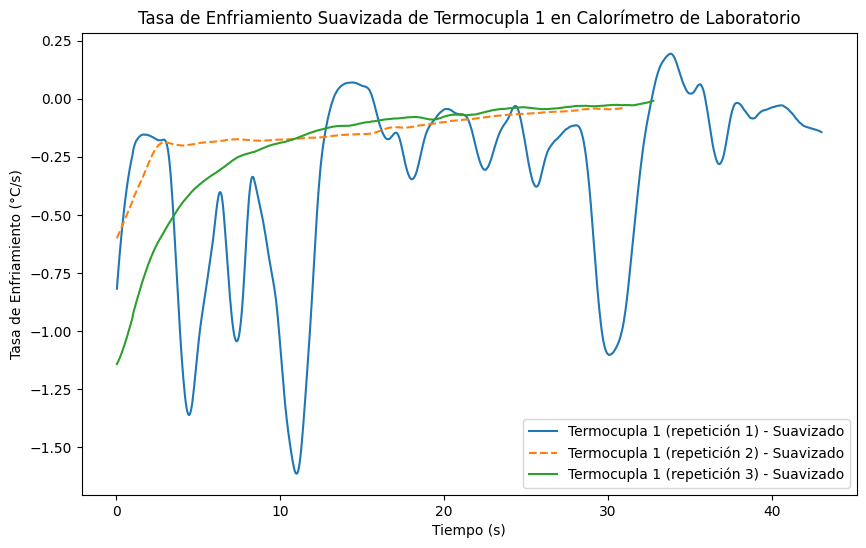

In [41]:
# Calcular la tasa de enfriamiento
d4['tasa_enfriamiento_1'] = d4['Termocupla_1'].diff() / d4['Tiempo'].diff()
d5['tasa_enfriamiento_2'] = d5['Termocupla_1'].diff() / d5['Tiempo'].diff()
d6['tasa_enfriamiento_3'] = d6['Termocupla_1'].diff() / d6['Tiempo'].diff()

d4.dropna(subset=['tasa_enfriamiento_1'], inplace=True)
d5.dropna(subset=['tasa_enfriamiento_2'], inplace=True)
d6.dropna(subset=['tasa_enfriamiento_3'], inplace=True)

# Suavizar los datos usando una media móvil

window_size = 40  # Ajusta este valor según sea necesario
poly_order = 3    # Orden del polinomio

d4['tasa_enfriamiento_1_suavizada'] = savgol_filter(uniform_filter1d(d4['tasa_enfriamiento_1'], size=10), window_size, poly_order)
d5['tasa_enfriamiento_2_suavizada'] = savgol_filter(uniform_filter1d(d5['tasa_enfriamiento_2'], size=20), window_size, poly_order)
d6['tasa_enfriamiento_3_suavizada'] = savgol_filter(uniform_filter1d(d6['tasa_enfriamiento_3'], size=20), window_size, poly_order)

# Graficar los datos suavizados
plt.figure(figsize=(10, 6))
plt.plot(d4['Tiempo'], d4['tasa_enfriamiento_1_suavizada'], label='Termocupla 1 (repetición 1) - Suavizado')
plt.plot(d5['Tiempo'], d5['tasa_enfriamiento_2_suavizada'], label='Termocupla 1 (repetición 2) - Suavizado', linestyle='dashed')
plt.plot(d6['Tiempo'], d6['tasa_enfriamiento_3_suavizada'], label='Termocupla 1 (repetición 3) - Suavizado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento Suavizada de Termocupla 1 en Calorímetro de Laboratorio')
plt.legend()
plt.show()


Diferencias promedios:
· repetición 1 con repetición 2: 0.16 ºC
· repetición 1 con repetición 3: 5.31 ºC
· repetición 2 con repetición 3: 5.46 ºC



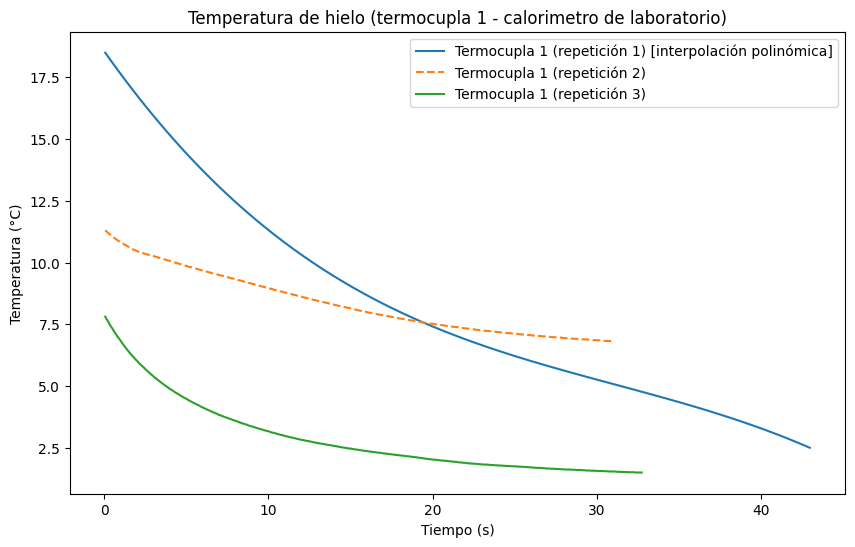

In [42]:
# Calorimetro de laboratorio
d4_ip = interpolacion_polinomica(d4['Tiempo'], d4['Termocupla_1'])
x = d4_ip[0]
y = d4_ip[1]

df4_ip = pd.DataFrame({'Tiempo': x,'Termocupla_1': y })

plt.figure(figsize=(10, 6))
plt.plot(df4_ip['Tiempo'], df4_ip['Termocupla_1'], label='Termocupla 1 (repetición 1) [interpolación polinómica]')
plt.plot(d5['Tiempo'], d5['Termocupla_1'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d6['Tiempo'], d6['Termocupla_1'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de hielo (termocupla 1 - calorimetro de laboratorio)')
plt.legend()

print("Diferencias promedios:")
dif_d4_d5 = round(abs(np.mean([y]) - np.mean([d5['Termocupla_1']])),2)
dif_d4_d6 = round(abs(np.mean([y]) - np.mean([d6['Termocupla_1']])),2)
print('· repetición 1 con repetición 2: '+str(dif_d4_d5)+' ºC')
print('· repetición 1 con repetición 3: '+str(dif_d4_d6)+' ºC')

dif_d5_d6 = round(abs(np.mean([d5['Termocupla_1']]) - np.mean([d6['Termocupla_1']])),2)
print('· repetición 2 con repetición 3: '+str(dif_d5_d6)+' ºC'+'\n')

plt.show()

Parámetros del ajuste exponencial (repetición 1): a=16.83, b=0.05, c=1.46 => T = [16.83*e^(-0.05*t)]+1.46 || R^2=0.9718
Parámetros del ajuste exponencial (repetición 2): a=5.48, b=0.05, c=5.64 => T = [5.48*e^(-0.05*t)]+5.64 || R^2=0.9983
Parámetros del ajuste exponencial (repetición 3): a=5.89, b=0.13, c=1.53 => T = [5.89*e^(-0.13*t)]+1.53 || R^2=0.9963

Parámetros del ajuste exponencial promedios: a=9.4, b=0.08, c=2.88



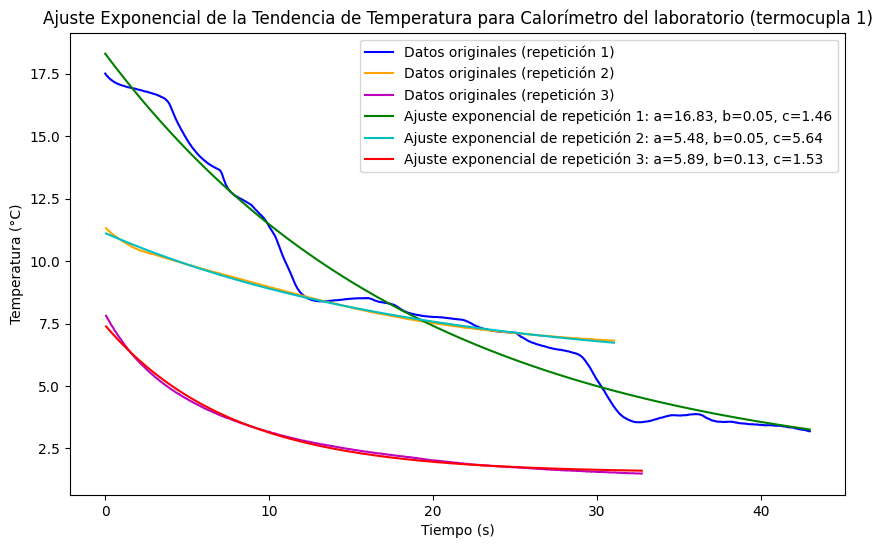

In [186]:
# Función exponencial


def monoExp(x, a, b, c):
    return a * np.exp(-b * x) + c

# Ajustar una curva exponencial a los datos

popt_4, pcov_4 = curve_fit(monoExp, d4['Tiempo'].dropna(), d4['Termocupla_1'].dropna())
popt_5, pcov_5 = curve_fit(monoExp, d5['Tiempo'].dropna(), d5['Termocupla_1'].dropna())
popt_6, pcov_6 = curve_fit(monoExp, d6['Tiempo'].dropna(), d6['Termocupla_1'].dropna())

# Generar datos para la curva ajustada
tiempo_fit_4 = np.linspace(d4['Tiempo'].min(), d4['Tiempo'].max(), 50000)
tasa_fit_4 = monoExp(tiempo_fit_4, *popt_4)

tiempo_fit_5 = np.linspace(d5['Tiempo'].min(), d5['Tiempo'].max(), 500)
tasa_fit_5 = monoExp(tiempo_fit_5, *popt_5)

tiempo_fit_6 = np.linspace(d6['Tiempo'].min(), d6['Tiempo'].max(), 500)
tasa_fit_6 = monoExp(tiempo_fit_6, *popt_6)

# Calcular R^2 para cada ajuste
R2_4 = calcular_R2(d4['Termocupla_1'].dropna(), monoExp(d4['Tiempo'].dropna(), *popt_4))
R2_5 = calcular_R2(d5['Termocupla_1'].dropna(), monoExp(d5['Tiempo'].dropna(), *popt_5))
R2_6 = calcular_R2(d6['Termocupla_1'].dropna(), monoExp(d6['Tiempo'].dropna(), *popt_6))


# Graficar los datos y la curva ajustada
plt.figure(figsize=(10, 6))
plt.plot(d4['Tiempo'], d4['Termocupla_1'], 'b-', label='Datos originales (repetición 1)')
plt.plot(d5['Tiempo'], d5['Termocupla_1'], 'orange', label='Datos originales (repetición 2)')
plt.plot(d6['Tiempo'], d6['Termocupla_1'], 'm-', label='Datos originales (repetición 3)')

plt.plot(tiempo_fit_4, tasa_fit_4, 'g-', label='Ajuste exponencial de repetición 1: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_4))
plt.plot(tiempo_fit_5, tasa_fit_5, 'c-', label='Ajuste exponencial de repetición 2: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_5))
plt.plot(tiempo_fit_6, tasa_fit_6, 'r-', label='Ajuste exponencial de repetición 3: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_6))

plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial de la Tendencia de Temperatura para Calorímetro del laboratorio (termocupla 1)')
plt.legend()

print(f'Parámetros del ajuste exponencial (repetición 1): a={round(popt_4[0],2)}, b={round(popt_4[1],2)}, c={round(popt_4[2],2)} => T = [{round(popt_4[0],2)}*e^(-{round(popt_4[1],2)}*t)]+{round(popt_4[2],2)} || R^2={R2_4:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 2): a={round(popt_5[0],2)}, b={round(popt_5[1],2)}, c={round(popt_5[2],2)} => T = [{round(popt_5[0],2)}*e^(-{round(popt_5[1],2)}*t)]+{round(popt_5[2],2)} || R^2={R2_5:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 3): a={round(popt_6[0],2)}, b={round(popt_6[1],2)}, c={round(popt_6[2],2)} => T = [{round(popt_6[0],2)}*e^(-{round(popt_6[1],2)}*t)]+{round(popt_6[2],2)} || R^2={R2_6:.4f}')
print()

print(f'Parámetros del ajuste exponencial promedios: a={round((popt_4[0]+popt_5[0]+popt_6[0])/3,2)}, b={round((popt_4[1]+popt_5[1]+popt_6[1])/3,2)}, c={round((popt_4[2]+popt_5[2]+popt_6[2])/3,2)}')
print()
plt.show()

Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: -0.35 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: -0.15 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: -0.19 °C/s



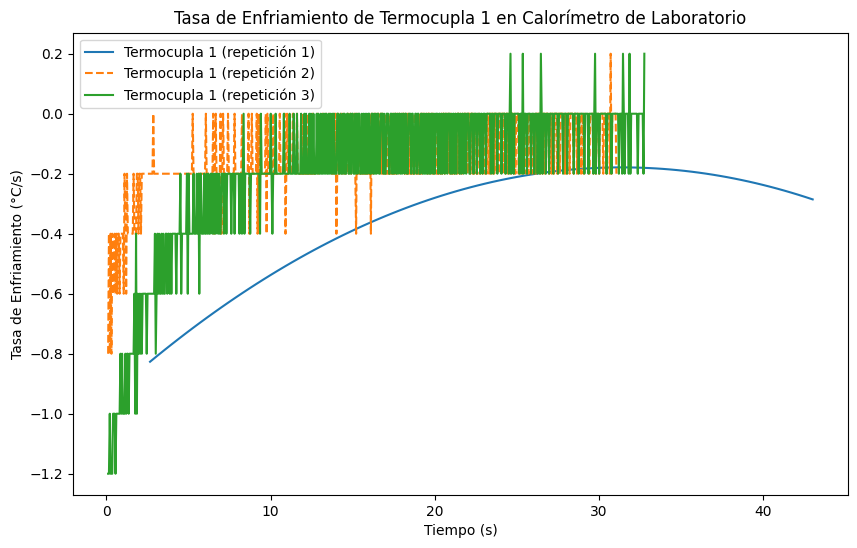

In [187]:
# Calorimetro de laboratorio

df4_ip['tasa_enfriamiento_1'] = df4_ip['Termocupla_1'].diff()/df4_ip['Tiempo'].diff()
d5['tasa_enfriamiento_2'] = d5['Termocupla_1'].diff()/d5['Tiempo'].diff()
d6['tasa_enfriamiento_3'] = d6['Termocupla_1'].diff()/d6['Tiempo'].diff()

plt.figure(figsize=(10, 6))
plt.plot(df4_ip['Tiempo'], df4_ip['tasa_enfriamiento_1'], label='Termocupla 1 (repetición 1)')
plt.plot(d5['Tiempo'], d5['tasa_enfriamiento_2'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d6['Tiempo'], d6['tasa_enfriamiento_3'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento de Termocupla 1 en Calorímetro de Laboratorio')
plt.legend()

tasa_promedio_1 = round(df4_ip['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(d5['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(d6['tasa_enfriamiento_3'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: {tasa_promedio_3} °C/s'+'\n')

plt.show()

Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: -0.36 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: -0.15 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: -0.19 °C/s

Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 1]: -0.36 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 2]: -0.14 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 3]: -0.19 °C/s



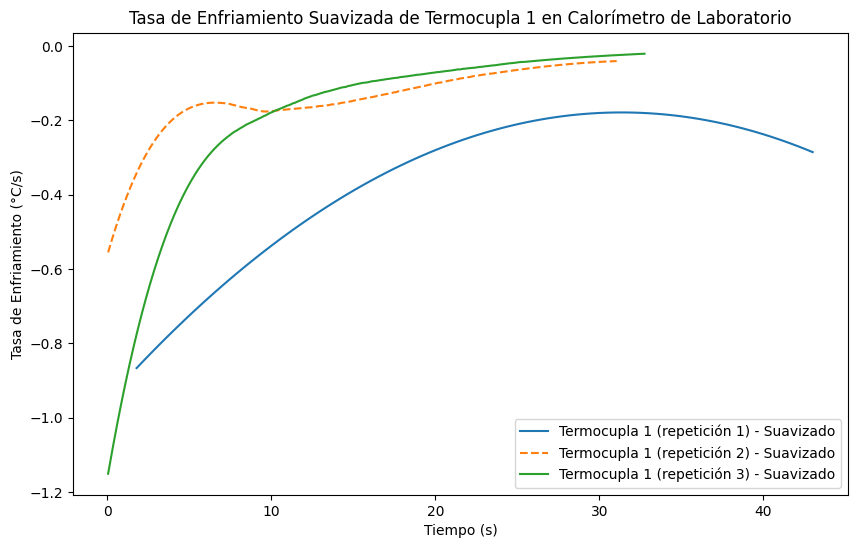

In [63]:
# Calcular la tasa de enfriamiento
df4_ip['tasa_enfriamiento_1'] = df4_ip['Termocupla_1'].diff() / df4_ip['Tiempo'].diff()
d5['tasa_enfriamiento_2'] = d5['Termocupla_1'].diff() / d5['Tiempo'].diff()
d6['tasa_enfriamiento_3'] = d6['Termocupla_1'].diff() / d6['Tiempo'].diff()

df4_ip.dropna(subset=['tasa_enfriamiento_1'], inplace=True)
d5.dropna(subset=['tasa_enfriamiento_2'], inplace=True)
d6.dropna(subset=['tasa_enfriamiento_3'], inplace=True)

# Suavizar los datos usando una media móvil
window_size = 300  # Ajusta este valor según sea necesario
poly_order = 3    # Orden del polinomio

df4_ip['tasa_enfriamiento_1_suavizada'] = df4_ip['tasa_enfriamiento_1']
d5['tasa_enfriamiento_2_suavizada'] = savgol_filter(uniform_filter1d(d5['tasa_enfriamiento_2'], size=4), window_size, poly_order)
d6['tasa_enfriamiento_3_suavizada'] = savgol_filter(uniform_filter1d(d6['tasa_enfriamiento_3'], size=4), window_size, poly_order)

# Graficar los datos suavizados
plt.figure(figsize=(10, 6))
plt.plot(df4_ip['Tiempo'], df4_ip['tasa_enfriamiento_1_suavizada'], label='Termocupla 1 (repetición 1) - Suavizado')
plt.plot(d5['Tiempo'], d5['tasa_enfriamiento_2_suavizada'], label='Termocupla 1 (repetición 2) - Suavizado', linestyle='dashed')
plt.plot(d6['Tiempo'], d6['tasa_enfriamiento_3_suavizada'], label='Termocupla 1 (repetición 3) - Suavizado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento Suavizada de Termocupla 1 en Calorímetro de Laboratorio')
plt.legend()

tasa_promedio_1 = round(df4_ip['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(d5['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(d6['tasa_enfriamiento_3'].mean(),2)

tasa_promedio_1s = round(df4_ip['tasa_enfriamiento_1_suavizada'].mean(),2)
tasa_promedio_2s = round(d5['tasa_enfriamiento_2_suavizada'].mean(),2)
tasa_promedio_3s = round(d6['tasa_enfriamiento_3_suavizada'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: {tasa_promedio_3} °C/s'+'\n')

print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 1]: {tasa_promedio_1s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 2]: {tasa_promedio_2s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 3]: {tasa_promedio_3s} °C/s'+'\n')

plt.show()

Análisis de varianza (ANOVA)

Estadístico F: 1783.755745831675
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.



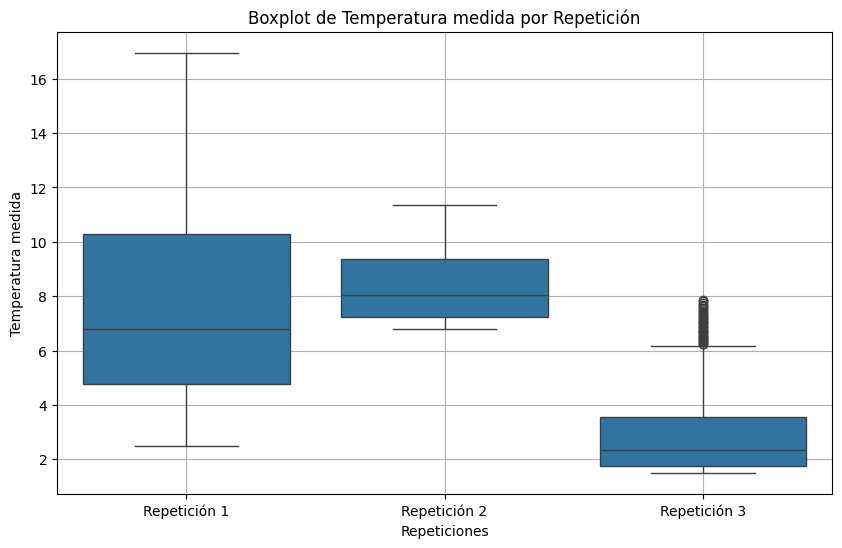

In [75]:
df = pd.DataFrame({
    'Grupo': ['Repetición 1'] * len(df4_ip['Termocupla_1']) + ['Repetición 2'] * len(d5['Termocupla_1']) + ['Repetición 3'] * len(d6['Termocupla_1']),
    'Termocupla_1': pd.concat([df4_ip['Termocupla_1'], d5['Termocupla_1'], d6['Termocupla_1']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocupla_1', data=df)
plt.title('Boxplot de Temperatura medida por Repetición')
plt.xlabel('Repeticiones')
plt.ylabel('Temperatura medida')
plt.grid(True)


# Aplicar ANOVA
statistic, p_value = f_oneway(df4_ip['Termocupla_1'], d5['Termocupla_1'], d6['Termocupla_1'])

# Mostrar resultados
print('Análisis de varianza (ANOVA)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

### Calorímetro casero, termocupla 2

Diferencias promedios:
· repetición 1 con repetición 2: 6.36 ºC
· repetición 1 con repetición 3: 5.75 ºC
· repetición 2 con repetición 3: 0.62 ºC



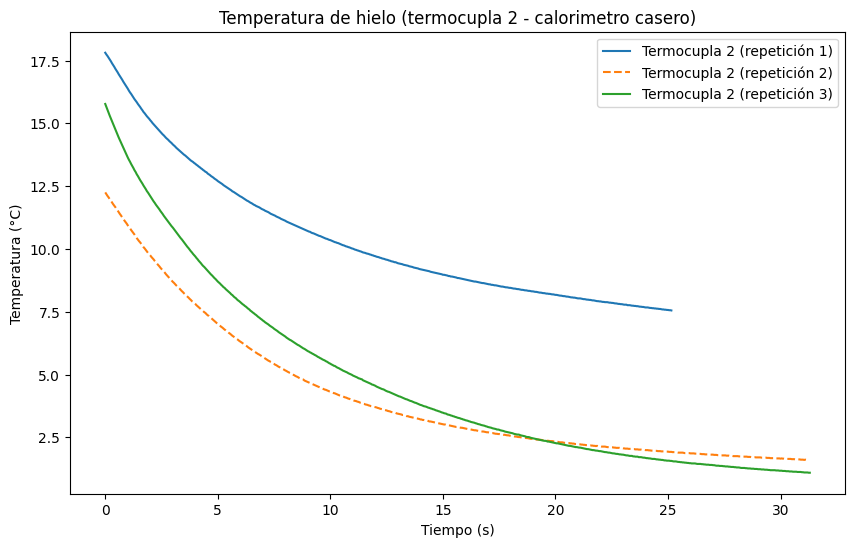

In [45]:
# Calorimetro casero
plt.figure(figsize=(10, 6))
plt.plot(d7['Tiempo'], d7['Termocupla_2'], label='Termocupla 2 (repetición 1)')
plt.plot(d8['Tiempo'], d8['Termocupla_2'], label='Termocupla 2 (repetición 2)', linestyle='dashed')
plt.plot(d9['Tiempo'], d9['Termocupla_2'], label='Termocupla 2 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de hielo (termocupla 2 - calorimetro casero)')
plt.legend()

print("Diferencias promedios:")
dif_d7_d8 = round(abs(np.mean([d7['Termocupla_2']]) - np.mean([d8['Termocupla_2']])),2)
dif_d7_d9 = round(abs(np.mean([d7['Termocupla_2']]) - np.mean([d9['Termocupla_2']])),2)
print('· repetición 1 con repetición 2: '+str(dif_d7_d8)+' ºC')
print('· repetición 1 con repetición 3: '+str(dif_d7_d9)+' ºC')

dif_d8_d9 = round(abs(np.mean([d8['Termocupla_2']]) - np.mean([d9['Termocupla_2']])),2)
print('· repetición 2 con repetición 3: '+str(dif_d8_d9)+' ºC'+'\n')

plt.show()

Parámetros del ajuste exponencial (repetición 1): a=10.18, b=0.12, c=7.25 => T = [10.18*e^(-0.12*t)]+7.25 || R^2=0.9986
Parámetros del ajuste exponencial (repetición 2): a=10.7, b=0.13, c=1.54 => T = [10.7*e^(-0.13*t)]+1.54 || R^2=0.9998
Parámetros del ajuste exponencial (repetición 3): a=14.34, b=0.11, c=0.77 => T = [14.34*e^(-0.11*t)]+0.77 || R^2=0.9992

Parámetros del ajuste exponencial promedios: a=11.74, b=0.12, c=3.19



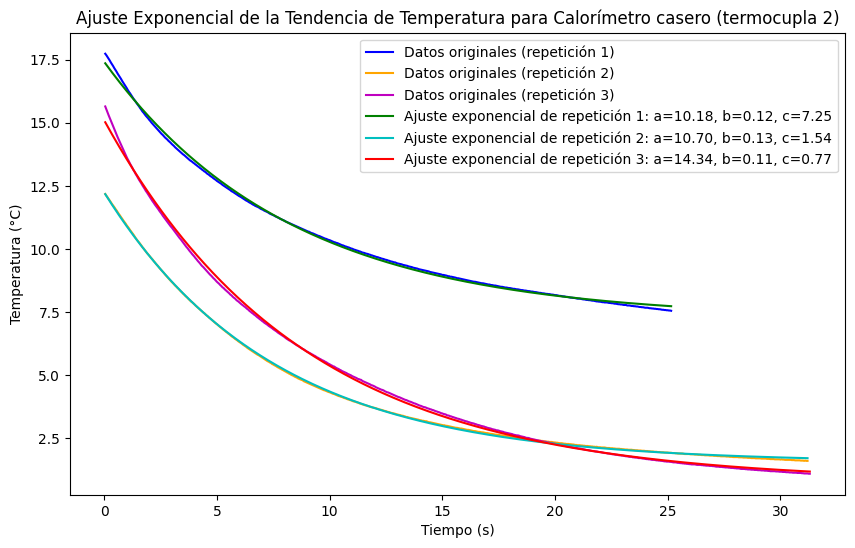

In [185]:
# Función exponencial


def monoExp(x, a, b, c):
    return a * np.exp(-b * x) + c

# Ajustar una curva exponencial a los datos

popt_7, pcov_7 = curve_fit(monoExp, d7['Tiempo'].dropna(), d7['Termocupla_2'].dropna())
popt_8, pcov_8 = curve_fit(monoExp, d8['Tiempo'].dropna(), d8['Termocupla_2'].dropna())
popt_9, pcov_9 = curve_fit(monoExp, d9['Tiempo'].dropna(), d9['Termocupla_2'].dropna())

# Generar datos para la curva ajustada
tiempo_fit_7 = np.linspace(d7['Tiempo'].min(), d7['Tiempo'].max(), 50000)
tasa_fit_7 = monoExp(tiempo_fit_7, *popt_7)

tiempo_fit_8 = np.linspace(d8['Tiempo'].min(), d8['Tiempo'].max(), 500)
tasa_fit_8 = monoExp(tiempo_fit_8, *popt_8)

tiempo_fit_9 = np.linspace(d9['Tiempo'].min(), d9['Tiempo'].max(), 500)
tasa_fit_9 = monoExp(tiempo_fit_9, *popt_9)

# Calcular R^2 para cada ajuste
R2_7 = calcular_R2(d7['Termocupla_2'].dropna(), monoExp(d7['Tiempo'].dropna(), *popt_7))
R2_8 = calcular_R2(d8['Termocupla_2'].dropna(), monoExp(d8['Tiempo'].dropna(), *popt_8))
R2_9 = calcular_R2(d9['Termocupla_2'].dropna(), monoExp(d9['Tiempo'].dropna(), *popt_9))


# Graficar los datos y la curva ajustada
plt.figure(figsize=(10, 6))
plt.plot(d7['Tiempo'], d7['Termocupla_2'], 'b-', label='Datos originales (repetición 1)')
plt.plot(d8['Tiempo'], d8['Termocupla_2'], 'orange', label='Datos originales (repetición 2)')
plt.plot(d9['Tiempo'], d9['Termocupla_2'], 'm-', label='Datos originales (repetición 3)')

plt.plot(tiempo_fit_7, tasa_fit_7, 'g-', label='Ajuste exponencial de repetición 1: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_7))
plt.plot(tiempo_fit_8, tasa_fit_8, 'c-', label='Ajuste exponencial de repetición 2: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_8))
plt.plot(tiempo_fit_9, tasa_fit_9, 'r-', label='Ajuste exponencial de repetición 3: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_9))

plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial de la Tendencia de Temperatura para Calorímetro casero (termocupla 2)')
plt.legend()

print(f'Parámetros del ajuste exponencial (repetición 1): a={round(popt_7[0],2)}, b={round(popt_7[1],2)}, c={round(popt_7[2],2)} => T = [{round(popt_7[0],2)}*e^(-{round(popt_7[1],2)}*t)]+{round(popt_7[2],2)} || R^2={R2_7:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 2): a={round(popt_8[0],2)}, b={round(popt_8[1],2)}, c={round(popt_8[2],2)} => T = [{round(popt_8[0],2)}*e^(-{round(popt_8[1],2)}*t)]+{round(popt_8[2],2)} || R^2={R2_8:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 3): a={round(popt_9[0],2)}, b={round(popt_9[1],2)}, c={round(popt_9[2],2)} => T = [{round(popt_9[0],2)}*e^(-{round(popt_9[1],2)}*t)]+{round(popt_9[2],2)} || R^2={R2_9:.4f}')
print()

print(f'Parámetros del ajuste exponencial promedios: a={round((popt_7[0]+popt_8[0]+popt_9[0])/3,2)}, b={round((popt_7[1]+popt_8[1]+popt_9[1])/3,2)}, c={round((popt_7[2]+popt_8[2]+popt_9[2])/3,2)}')
print()
plt.show()

Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: -0.41 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: -0.34 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: -0.47 °C/s



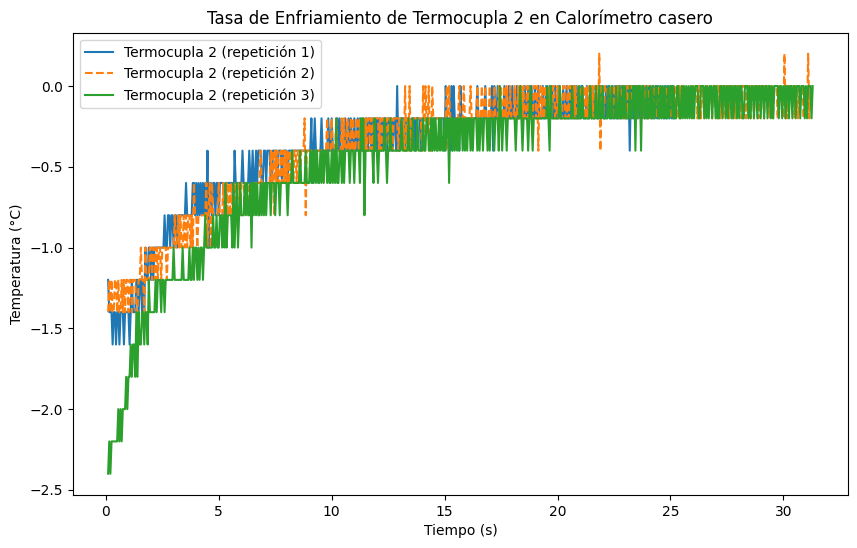

In [129]:
# Calorimetro casero

d7['tasa_enfriamiento_1'] = d7['Termocupla_2'].diff()/d7['Tiempo'].diff()
d8['tasa_enfriamiento_2'] = d8['Termocupla_2'].diff()/d8['Tiempo'].diff()
d9['tasa_enfriamiento_3'] = d9['Termocupla_2'].diff()/d9['Tiempo'].diff()

plt.figure(figsize=(10, 6))
plt.plot(d7['Tiempo'], d7['tasa_enfriamiento_1'], label='Termocupla 2 (repetición 1)')
plt.plot(d8['Tiempo'], d8['tasa_enfriamiento_2'], label='Termocupla 2 (repetición 2)', linestyle='dashed')
plt.plot(d9['Tiempo'], d9['tasa_enfriamiento_3'], label='Termocupla 2 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Tasa de Enfriamiento de Termocupla 2 en Calorímetro casero')
plt.legend()

tasa_promedio_1 = round(d7['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(d8['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(d9['tasa_enfriamiento_3'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: {tasa_promedio_3} °C/s'+'\n')

plt.show()

Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: -0.41 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: -0.34 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: -0.47 °C/s

Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 1]: -0.41 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 2]: -0.34 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 3]: -0.47 °C/s



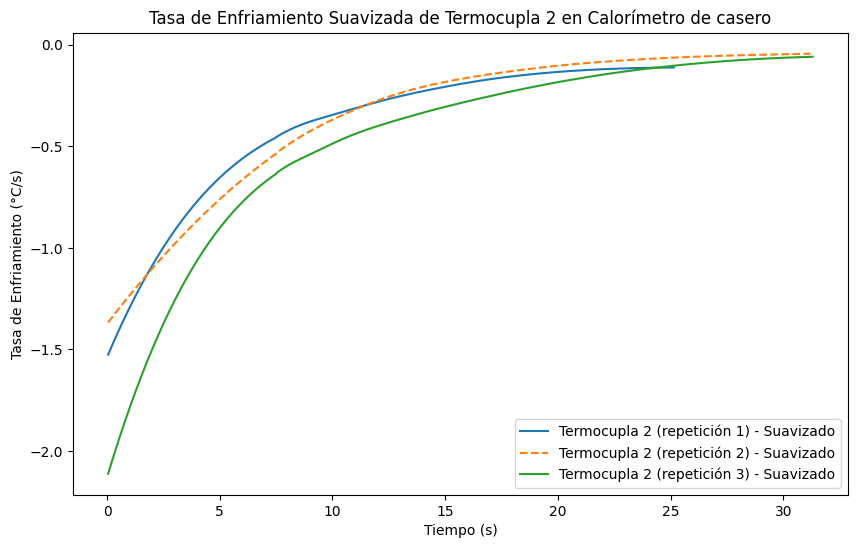

In [85]:
# Calcular la tasa de enfriamiento

d7['tasa_enfriamiento_1'] = d7['Termocupla_2'].diff() / d7['Tiempo'].diff()
d8['tasa_enfriamiento_2'] = d8['Termocupla_2'].diff() / d8['Tiempo'].diff()
d9['tasa_enfriamiento_3'] = d9['Termocupla_2'].diff() / d9['Tiempo'].diff()

d7.dropna(subset=['tasa_enfriamiento_1'], inplace=True)
d8.dropna(subset=['tasa_enfriamiento_2'], inplace=True)
d9.dropna(subset=['tasa_enfriamiento_3'], inplace=True)

# Suavizar los datos usando una media móvil
window_size = 300  # Ajusta este valor según sea necesario
poly_order = 3    # Orden del polinomio

d7['tasa_enfriamiento_1_suavizada'] = savgol_filter(uniform_filter1d(d7['tasa_enfriamiento_1'], size=50), window_size, poly_order)
d8['tasa_enfriamiento_2_suavizada'] = savgol_filter(uniform_filter1d(d8['tasa_enfriamiento_2'], size=50), window_size, poly_order)
d9['tasa_enfriamiento_3_suavizada'] = savgol_filter(uniform_filter1d(d9['tasa_enfriamiento_3'], size=50), window_size, poly_order)

# Graficar los datos suavizados

plt.figure(figsize=(10, 6))
plt.plot(d7['Tiempo'], d7['tasa_enfriamiento_1_suavizada'], label='Termocupla 2 (repetición 1) - Suavizado')
plt.plot(d8['Tiempo'], d8['tasa_enfriamiento_2_suavizada'], label='Termocupla 2 (repetición 2) - Suavizado', linestyle='dashed')
plt.plot(d9['Tiempo'], d9['tasa_enfriamiento_3_suavizada'], label='Termocupla 2 (repetición 3) - Suavizado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento Suavizada de Termocupla 2 en Calorímetro de casero')
plt.legend()
tasa_promedio_1 = round(d7['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(d8['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(d9['tasa_enfriamiento_3'].mean(),2)

tasa_promedio_1s = round(d7['tasa_enfriamiento_1_suavizada'].mean(),2)
tasa_promedio_2s = round(d8['tasa_enfriamiento_2_suavizada'].mean(),2)
tasa_promedio_3s = round(d9['tasa_enfriamiento_3_suavizada'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: {tasa_promedio_3} °C/s'+'\n')

print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 1]: {tasa_promedio_1s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 2]: {tasa_promedio_2s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 3]: {tasa_promedio_3s} °C/s'+'\n')

plt.show()


Análisis de varianza (ANOVA)

Estadístico F: 699.710886056185
Valor p: 4.1030279738185844e-224
Hay diferencias significativas entre al menos dos grupos.



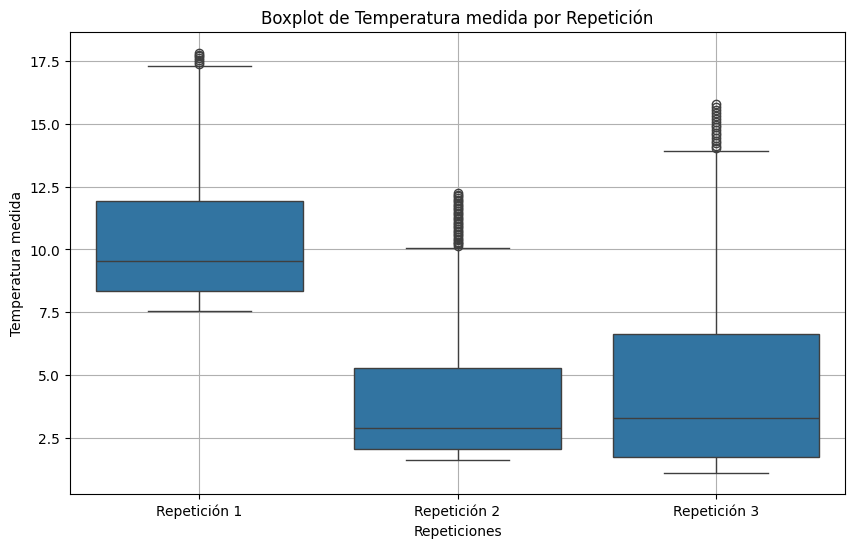

In [76]:
df = pd.DataFrame({
    'Grupo': ['Repetición 1'] * len(d7['Termocupla_2']) + ['Repetición 2'] * len(d8['Termocupla_2']) + ['Repetición 3'] * len(d9['Termocupla_2']),
    'Termocupla_2': pd.concat([d7['Termocupla_2'], d8['Termocupla_2'], d9['Termocupla_2']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocupla_2', data=df)
plt.title('Boxplot de Temperatura medida por Repetición')
plt.xlabel('Repeticiones')
plt.ylabel('Temperatura medida')
plt.grid(True)


# Aplicar ANOVA
statistic, p_value = f_oneway(d7['Termocupla_2'], d8['Termocupla_2'], d9['Termocupla_2'])

# Mostrar resultados
print('Análisis de varianza (ANOVA)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

### **Mediciones de mezcla de agua con hielo en cada calorímetro**



*   Calorímetro del laboratorio: termocupla 1
*   Calorímetro casero: termocupla 2



In [170]:
f10 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep1/temp4_mezcla_de_agua_hielo.csv'
f11 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep2/temp4_mezcla_de_agua_hielo.csv'
f12 = '/content/drive/MyDrive/GoogleColab/Termo/Lab2/Datos/ParteA/rep3/temp4_mezcla_de_agua_hielo.csv'

d10 = pd.read_csv(f10)
d11 = pd.read_csv(f11)
d12 = pd.read_csv(f12)

Diferencias promedios:
· repetición 1 con repetición 2: 3.75 ºC
· repetición 1 con repetición 3: 3.52 ºC
· repetición 2 con repetición 3: 0.23 ºC



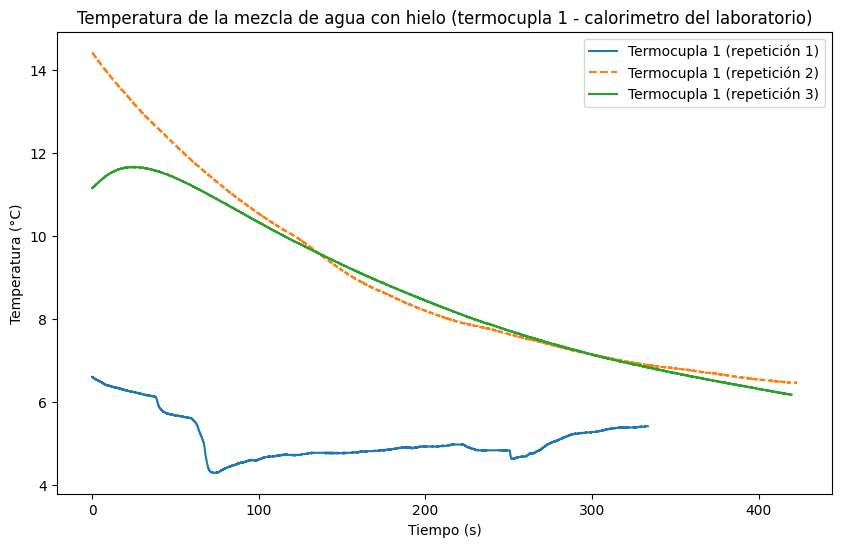

In [134]:
# Calorimetro del laboratorio
plt.figure(figsize=(10, 6))
plt.plot(d10['Tiempo'], d10['Termocupla_1'], label='Termocupla 1 (repetición 1)')
plt.plot(d11['Tiempo'], d11['Termocupla_1'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d12['Tiempo'], d12['Termocupla_1'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de la mezcla de agua con hielo (termocupla 1 - calorimetro del laboratorio)')
plt.legend()

print("Diferencias promedios:")
dif_d10_d11 = round(abs(np.mean([d10['Termocupla_1']]) - np.mean([d11['Termocupla_1']])),2)
dif_d10_d12 = round(abs(np.mean([d10['Termocupla_1']]) - np.mean([d12['Termocupla_1']])),2)
print('· repetición 1 con repetición 2: '+str(dif_d10_d11)+' ºC')
print('· repetición 1 con repetición 3: '+str(dif_d10_d12)+' ºC')

dif_d11_d12 = round(abs(np.mean([d11['Termocupla_1']]) - np.mean([d12['Termocupla_1']])),2)
print('· repetición 2 con repetición 3: '+str(dif_d11_d12)+' ºC'+'\n')

plt.show()

Diferencias promedios:
· repetición 1 con repetición 2: 1.38 ºC
· repetición 1 con repetición 3: 1.8 ºC
· repetición 2 con repetición 3: 0.42 ºC



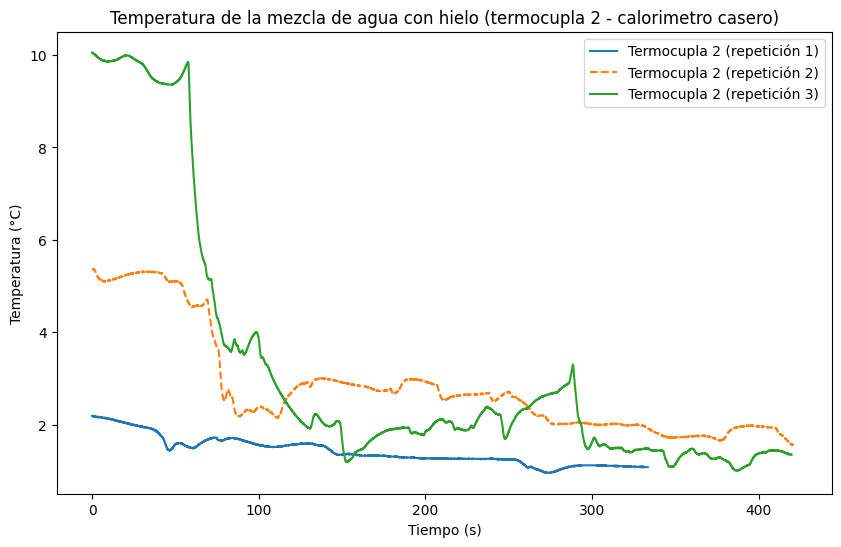

In [132]:
# Calorimetro casero
plt.figure(figsize=(10, 6))
plt.plot(d10['Tiempo'], d10['Termocupla_2'], label='Termocupla 2 (repetición 1)')
plt.plot(d11['Tiempo'], d11['Termocupla_2'], label='Termocupla 2 (repetición 2)', linestyle='dashed')
plt.plot(d12['Tiempo'], d12['Termocupla_2'], label='Termocupla 2 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de la mezcla de agua con hielo (termocupla 2 - calorimetro casero)')
plt.legend()

print("Diferencias promedios:")
dif_d10_d11 = round(abs(np.mean([d10['Termocupla_2']]) - np.mean([d11['Termocupla_2']])),2)
dif_d10_d12 = round(abs(np.mean([d10['Termocupla_2']]) - np.mean([d12['Termocupla_2']])),2)
print('· repetición 1 con repetición 2: '+str(dif_d10_d11)+' ºC')
print('· repetición 1 con repetición 3: '+str(dif_d10_d12)+' ºC')

dif_d11_d12 = round(abs(np.mean([d11['Termocupla_2']]) - np.mean([d12['Termocupla_2']])),2)
print('· repetición 2 con repetición 3: '+str(dif_d11_d12)+' ºC'+'\n')

plt.show()

Aplicación de interpolación polinomial cúbica para mejor análisis del comportamiento de los datos de temperatura a lo largo del tiempo

In [171]:
# Calorimetro del laboratorio
d10_ip_t1 = interpolacion_polinomica(d10['Tiempo'], d10['Termocupla_1'])
x = d10_ip_t1[0]
y = d10_ip_t1[1]

df10_ip_t1 = pd.DataFrame({'Tiempo': x,'Termocupla_1': y })

Diferencias promedios:
· repetición 1 con repetición 2: 3.75 ºC
· repetición 1 con repetición 3: 3.51 ºC
· repetición 2 con repetición 3: 0.23 ºC



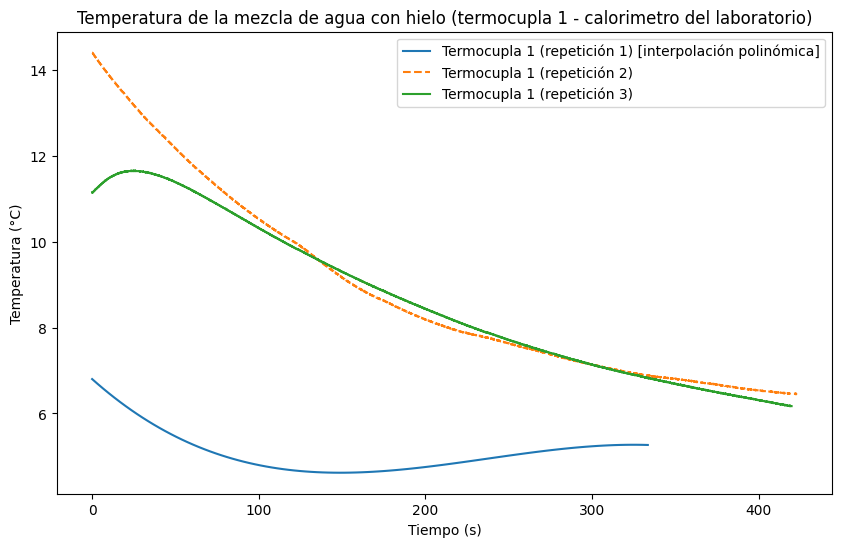

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(df10_ip_t1['Tiempo'], df10_ip_t1['Termocupla_1'], label='Termocupla 1 (repetición 1) [interpolación polinómica]')
plt.plot(d11['Tiempo'], d11['Termocupla_1'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d12['Tiempo'], d12['Termocupla_1'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de la mezcla de agua con hielo (termocupla 1 - calorimetro del laboratorio)')
plt.legend()

print("Diferencias promedios:")
dif_d10_d11 = round(abs(np.mean([df10_ip_t1['Termocupla_1']]) - np.mean([d11['Termocupla_1']])),2)
dif_d10_d12 = round(abs(np.mean([df10_ip_t1['Termocupla_1']]) - np.mean([d12['Termocupla_1']])),2)
print('· repetición 1 con repetición 2: '+str(dif_d10_d11)+' ºC')
print('· repetición 1 con repetición 3: '+str(dif_d10_d12)+' ºC')

dif_d11_d12 = round(abs(np.mean([d11['Termocupla_1']]) - np.mean([d12['Termocupla_1']])),2)
print('· repetición 2 con repetición 3: '+str(dif_d11_d12)+' ºC'+'\n')

plt.show()

In [162]:
# Calorimetro casero
d10_ip_t2 = interpolacion_polinomica(d10['Tiempo'], d10['Termocupla_2'])
x = d10_ip_t2[0]
y = d10_ip_t2[1]
df10_ip_t2 = pd.DataFrame({'Tiempo': x,'Termocupla_2': y })

d11_ip_t2 = interpolacion_polinomica(d11['Tiempo'], d11['Termocupla_2'])
x = d11_ip_t2[0]
y = d11_ip_t2[1]
df11_ip_t2 = pd.DataFrame({'Tiempo': x,'Termocupla_2': y })

d12_ip_t2 = interpolacion_polinomica(d12['Tiempo'], d12['Termocupla_2'])
x = d12_ip_t2[0]
y = d12_ip_t2[1]
df12_ip_t2 = pd.DataFrame({'Tiempo': x,'Termocupla_2': y })

Diferencias promedios:
· repetición 1 con repetición 2: 1.39 ºC
· repetición 1 con repetición 3: 1.83 ºC
· repetición 2 con repetición 3: 0.44 ºC



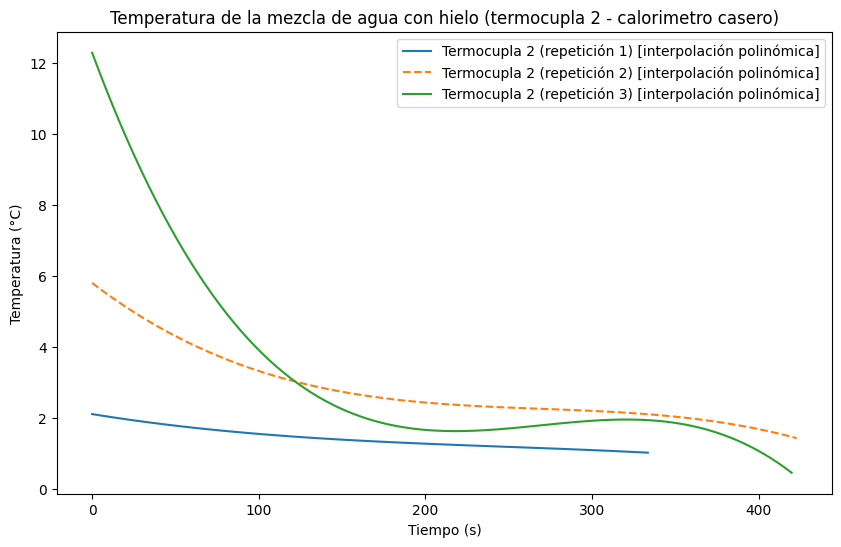

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(df10_ip_t2['Tiempo'], df10_ip_t2['Termocupla_2'], label='Termocupla 2 (repetición 1) [interpolación polinómica]')
plt.plot(df11_ip_t2['Tiempo'], df11_ip_t2['Termocupla_2'], label='Termocupla 2 (repetición 2) [interpolación polinómica]', linestyle='dashed')
plt.plot(df12_ip_t2['Tiempo'], df12_ip_t2['Termocupla_2'], label='Termocupla 2 (repetición 3) [interpolación polinómica]')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de la mezcla de agua con hielo (termocupla 2 - calorimetro casero)')
plt.legend()

print("Diferencias promedios:")
dif_d10_d11 = round(abs(np.mean([df10_ip_t2['Termocupla_2']]) - np.mean([df11_ip_t2['Termocupla_2']])),2)
dif_d10_d12 = round(abs(np.mean([df10_ip_t2['Termocupla_2']]) - np.mean([df12_ip_t2['Termocupla_2']])),2)
print('· repetición 1 con repetición 2: '+str(dif_d10_d11)+' ºC')
print('· repetición 1 con repetición 3: '+str(dif_d10_d12)+' ºC')

dif_d11_d12 = round(abs(np.mean([df11_ip_t2['Termocupla_2']]) - np.mean([df12_ip_t2['Termocupla_2']])),2)
print('· repetición 2 con repetición 3: '+str(dif_d11_d12)+' ºC'+'\n')

plt.show()

Tasa de cambio de  temperatura para cada conjunto de datos de cada calorímetro

Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: -0.0 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: -0.02 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: -0.01 °C/s



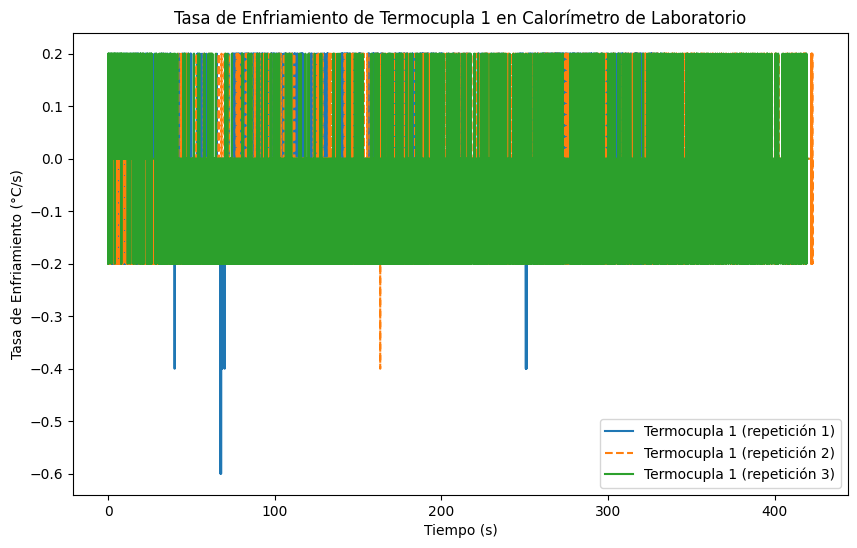

In [174]:
#Calorímetro del laboratorio

# Calcular la tasa de enfriamiento
d10['tasa_enfriamiento_1'] = d10['Termocupla_1'].diff() / d10['Tiempo'].diff()
d11['tasa_enfriamiento_2'] = d11['Termocupla_1'].diff() / d11['Tiempo'].diff()
d12['tasa_enfriamiento_3'] = d12['Termocupla_1'].diff() / d12['Tiempo'].diff()

# Graficar los datos suavizados
plt.figure(figsize=(10, 6))
plt.plot(d10['Tiempo'], d10['tasa_enfriamiento_1'], label='Termocupla 1 (repetición 1)')
plt.plot(d11['Tiempo'], d11['tasa_enfriamiento_2'], label='Termocupla 1 (repetición 2)', linestyle='dashed')
plt.plot(d12['Tiempo'], d12['tasa_enfriamiento_3'], label='Termocupla 1 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento de Termocupla 1 en Calorímetro de Laboratorio')
plt.legend()

tasa_promedio_1 = round(d10['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(d11['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(d12['tasa_enfriamiento_3'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: {tasa_promedio_3} °C/s'+'\n')


plt.show()

Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: -0.0 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: -0.02 °C/s
Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: -0.01 °C/s

Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 1]: -0.0 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 2]: -0.02 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 3]: -0.01 °C/s



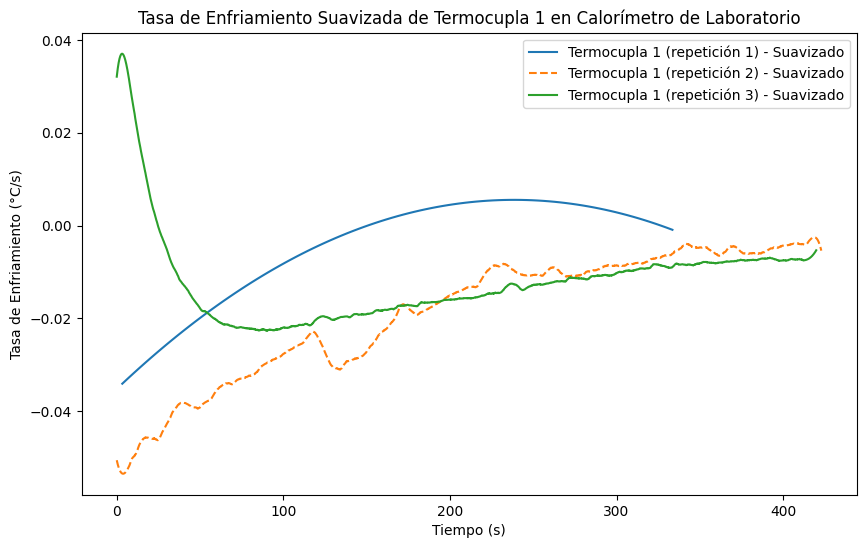

In [163]:
#Calorímetro del laboratorio

# Calcular la tasa de enfriamiento
df10_ip_t1['tasa_enfriamiento_1'] = df10_ip_t1['Termocupla_1'].diff() / df10_ip_t1['Tiempo'].diff()
d11['tasa_enfriamiento_2'] = d11['Termocupla_1'].diff() / d11['Tiempo'].diff()
d12['tasa_enfriamiento_3'] = d12['Termocupla_1'].diff() / d12['Tiempo'].diff()

df10_ip_t1.dropna(subset=['tasa_enfriamiento_1'], inplace=True)
d11.dropna(subset=['tasa_enfriamiento_2'], inplace=True)
d12.dropna(subset=['tasa_enfriamiento_3'], inplace=True)

# Suavizar los datos usando una media móvil
window_size = 300  # Ajusta este valor según sea necesario
poly_order = 3    # Orden del polinomio

df10_ip_t1['tasa_enfriamiento_1_suavizada'] = df10_ip_t1['tasa_enfriamiento_1']
d11['tasa_enfriamiento_2_suavizada'] = savgol_filter(uniform_filter1d(d11['tasa_enfriamiento_2'], size=50), window_size, poly_order)
d12['tasa_enfriamiento_3_suavizada'] = savgol_filter(uniform_filter1d(d12['tasa_enfriamiento_3'], size=50), window_size, poly_order)

# Graficar los datos suavizados
plt.figure(figsize=(10, 6))
plt.plot(df10_ip_t1['Tiempo'], df10_ip_t1['tasa_enfriamiento_1_suavizada'], label='Termocupla 1 (repetición 1) - Suavizado')
plt.plot(d11['Tiempo'], d11['tasa_enfriamiento_2_suavizada'], label='Termocupla 1 (repetición 2) - Suavizado', linestyle='dashed')
plt.plot(d12['Tiempo'], d12['tasa_enfriamiento_3_suavizada'], label='Termocupla 1 (repetición 3) - Suavizado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento Suavizada de Termocupla 1 en Calorímetro de Laboratorio')
plt.legend()

tasa_promedio_1 = round(df10_ip_t1['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(d11['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(d12['tasa_enfriamiento_3'].mean(),2)

tasa_promedio_1s = round(df10_ip_t1['tasa_enfriamiento_1_suavizada'].mean(),2)
tasa_promedio_2s = round(d11['tasa_enfriamiento_2_suavizada'].mean(),2)
tasa_promedio_3s = round(d12['tasa_enfriamiento_3_suavizada'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro de laboratorio [repetición 3]: {tasa_promedio_3} °C/s'+'\n')

print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 1]: {tasa_promedio_1s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 2]: {tasa_promedio_2s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro de laboratorio [repetición 3]: {tasa_promedio_3s} °C/s'+'\n')

plt.show()

Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: -0.0 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: -0.01 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: -0.02 °C/s



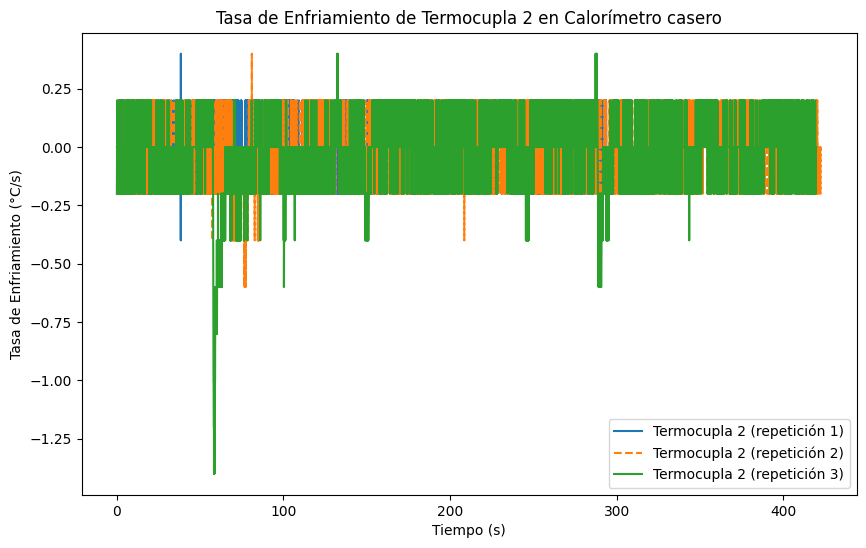

In [175]:
#Calorímetro casero

# Calcular la tasa de enfriamiento
d10['tasa_enfriamiento_1'] = d10['Termocupla_2'].diff() / d10['Tiempo'].diff()
d11['tasa_enfriamiento_2'] = d11['Termocupla_2'].diff() / d11['Tiempo'].diff()
d12['tasa_enfriamiento_3'] = d12['Termocupla_2'].diff() / d12['Tiempo'].diff()

# Graficar los datos suavizados
plt.figure(figsize=(10, 6))
plt.plot(d10['Tiempo'], d10['tasa_enfriamiento_1'], label='Termocupla 2 (repetición 1)')
plt.plot(d11['Tiempo'], d11['tasa_enfriamiento_2'], label='Termocupla 2 (repetición 2)', linestyle='dashed')
plt.plot(d12['Tiempo'], d12['tasa_enfriamiento_3'], label='Termocupla 2 (repetición 3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento de Termocupla 2 en Calorímetro casero')
plt.legend()

tasa_promedio_1 = round(d10['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(d11['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(d12['tasa_enfriamiento_3'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: {tasa_promedio_3} °C/s'+'\n')

plt.show()

Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: -0.0 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: -0.01 °C/s
Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: -0.02 °C/s

Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 1]: -0.0 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 2]: -0.01 °C/s
Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 3]: -0.02 °C/s



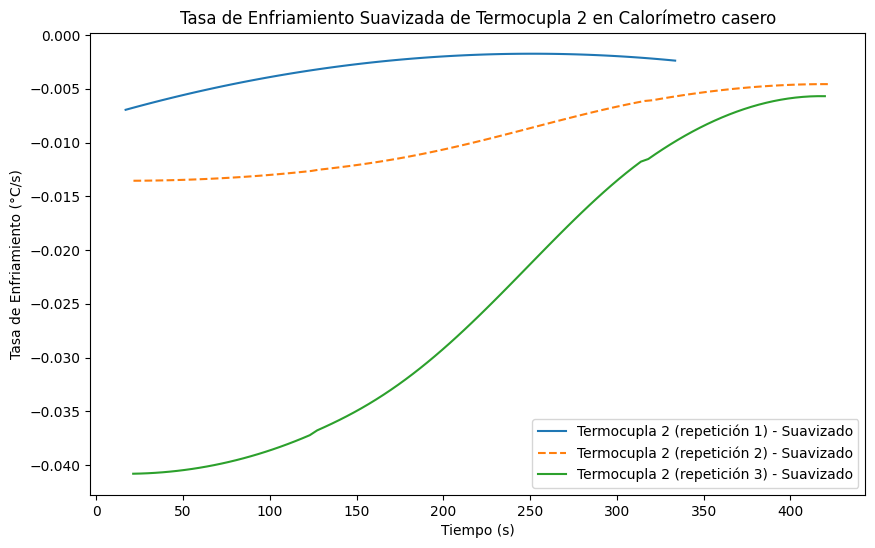

In [168]:
#Calorímetro casero

# Calcular la tasa de enfriamiento
df10_ip_t2['tasa_enfriamiento_1'] = df10_ip_t2['Termocupla_2'].diff() / df10_ip_t2['Tiempo'].diff()
df11_ip_t2['tasa_enfriamiento_2'] = df11_ip_t2['Termocupla_2'].diff() / df11_ip_t2['Tiempo'].diff()
df12_ip_t2['tasa_enfriamiento_3'] = df12_ip_t2['Termocupla_2'].diff() / df12_ip_t2['Tiempo'].diff()

df10_ip_t2.dropna(subset=['tasa_enfriamiento_1'], inplace=True)
df11_ip_t2.dropna(subset=['tasa_enfriamiento_2'], inplace=True)
df12_ip_t2.dropna(subset=['tasa_enfriamiento_3'], inplace=True)

# Suavizar los datos usando una media móvil
window_size = 50  # Ajusta este valor según sea necesario
poly_order = 3    # Orden del polinomio

df10_ip_t2['tasa_enfriamiento_1_suavizada'] = df10_ip_t2['tasa_enfriamiento_1']
df11_ip_t2['tasa_enfriamiento_2_suavizada'] = savgol_filter(uniform_filter1d(df11_ip_t2['tasa_enfriamiento_2'], size=100), window_size, poly_order)
df12_ip_t2['tasa_enfriamiento_3_suavizada'] = savgol_filter(uniform_filter1d(df12_ip_t2['tasa_enfriamiento_3'], size=100), window_size, poly_order)

# Graficar los datos suavizados
plt.figure(figsize=(10, 6))
plt.plot(df10_ip_t2['Tiempo'], df10_ip_t2['tasa_enfriamiento_1_suavizada'], label='Termocupla 2 (repetición 1) - Suavizado')
plt.plot(df11_ip_t2['Tiempo'], df11_ip_t2['tasa_enfriamiento_2_suavizada'], label='Termocupla 2 (repetición 2) - Suavizado', linestyle='dashed')
plt.plot(df12_ip_t2['Tiempo'], df12_ip_t2['tasa_enfriamiento_3_suavizada'], label='Termocupla 2 (repetición 3) - Suavizado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Enfriamiento (°C/s)')
plt.title('Tasa de Enfriamiento Suavizada de Termocupla 2 en Calorímetro casero')
plt.legend()

tasa_promedio_1 = round(df10_ip_t2['tasa_enfriamiento_1'].mean(),2)
tasa_promedio_2 = round(df11_ip_t2['tasa_enfriamiento_2'].mean(),2)
tasa_promedio_3 = round(df12_ip_t2['tasa_enfriamiento_3'].mean(),2)

tasa_promedio_1s = round(df10_ip_t2['tasa_enfriamiento_1_suavizada'].mean(),2)
tasa_promedio_2s = round(df11_ip_t2['tasa_enfriamiento_2_suavizada'].mean(),2)
tasa_promedio_3s = round(df12_ip_t2['tasa_enfriamiento_3_suavizada'].mean(),2)

print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 1]: {tasa_promedio_1} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 2]: {tasa_promedio_2} °C/s')
print(f'Tasa de enfriamiento promedio del Calorímetro casero [repetición 3]: {tasa_promedio_3} °C/s'+'\n')

print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 1]: {tasa_promedio_1s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 2]: {tasa_promedio_2s} °C/s')
print(f'Tasa de enfriamiento promedio (suavizado) del Calorímetro casero [repetición 3]: {tasa_promedio_3s} °C/s'+'\n')

plt.show()

Parámetros del ajuste exponencial (repetición 1): a=2.23, b=0.03, c=4.89 => T = [2.23*e^(-0.03*t)]+4.89 || R^2=0.6671
Parámetros del ajuste exponencial (repetición 2): a=8.68, b=0.01, c=5.8 => T = [8.68*e^(-0.01*t)]+5.8 || R^2=0.9994
Parámetros del ajuste exponencial (repetición 3): a=10.17, b=0.0, c=2.04 => T = [10.17*e^(-0.0*t)]+2.04 || R^2=0.9898

Parámetros del ajuste exponencial promedios: a=7.02, b=0.01, c=4.24



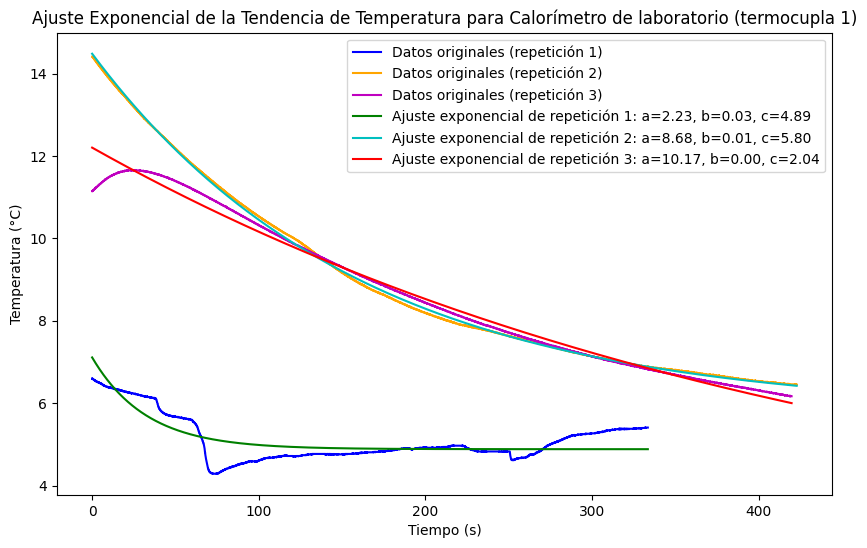

In [184]:
# Calorímetro de laboratorio - termocupla 1
# Función exponencial


def monoExp(x, a, b, c):
    return a * np.exp(-b * x) + c

# Ajustar una curva exponencial a los datos

popt_10t1, pcov_10t1 = curve_fit(monoExp, d10['Tiempo'].dropna(), d10['Termocupla_1'].dropna())
popt_11t1, pcov_11t1 = curve_fit(monoExp, d11['Tiempo'].dropna(), d11['Termocupla_1'].dropna())
popt_12t1, pcov_12t1 = curve_fit(monoExp, d12['Tiempo'].dropna(), d12['Termocupla_1'].dropna())

# Generar datos para la curva ajustada
tiempo_fit_10t1 = np.linspace(d10['Tiempo'].min(), d10['Tiempo'].max(), 50000)
tasa_fit_10t1 = monoExp(tiempo_fit_10t1, *popt_10t1)

tiempo_fit_11t1 = np.linspace(d11['Tiempo'].min(), d11['Tiempo'].max(), 500)
tasa_fit_11t1 = monoExp(tiempo_fit_11t1, *popt_11t1)

tiempo_fit_12t1 = np.linspace(d12['Tiempo'].min(), d12['Tiempo'].max(), 500)
tasa_fit_12t1 = monoExp(tiempo_fit_12t1, *popt_12t1)

# Calcular R^2 para cada ajuste
R2_10t1 = calcular_R2(d10['Termocupla_1'].dropna(), monoExp(d10['Tiempo'].dropna(), *popt_10t1))
R2_11t1 = calcular_R2(d11['Termocupla_1'].dropna(), monoExp(d11['Tiempo'].dropna(), *popt_11t1))
R2_12t1 = calcular_R2(d12['Termocupla_1'].dropna(), monoExp(d12['Tiempo'].dropna(), *popt_12t1))


# Graficar los datos y la curva ajustada
plt.figure(figsize=(10, 6))
plt.plot(d10['Tiempo'], d10['Termocupla_1'], 'b-', label='Datos originales (repetición 1)')
plt.plot(d11['Tiempo'], d11['Termocupla_1'], 'orange', label='Datos originales (repetición 2)')
plt.plot(d12['Tiempo'], d12['Termocupla_1'], 'm-', label='Datos originales (repetición 3)')

plt.plot(tiempo_fit_10t1, tasa_fit_10t1, 'g-', label='Ajuste exponencial de repetición 1: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_10t1))
plt.plot(tiempo_fit_11t1, tasa_fit_11t1, 'c-', label='Ajuste exponencial de repetición 2: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_11t1))
plt.plot(tiempo_fit_12t1, tasa_fit_12t1, 'r-', label='Ajuste exponencial de repetición 3: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_12t1))

plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial de la Tendencia de Temperatura para Calorímetro de laboratorio (termocupla 1)')
plt.legend()

print(f'Parámetros del ajuste exponencial (repetición 1): a={round(popt_10t1[0],2)}, b={round(popt_10t1[1],2)}, c={round(popt_10t1[2],2)} => T = [{round(popt_10t1[0],2)}*e^(-{round(popt_10t1[1],2)}*t)]+{round(popt_10t1[2],2)} || R^2={R2_10t1:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 2): a={round(popt_11t1[0],2)}, b={round(popt_11t1[1],2)}, c={round(popt_11t1[2],2)} => T = [{round(popt_11t1[0],2)}*e^(-{round(popt_11t1[1],2)}*t)]+{round(popt_11t1[2],2)} || R^2={R2_11t1:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 3): a={round(popt_12t1[0],2)}, b={round(popt_12t1[1],2)}, c={round(popt_12t1[2],2)} => T = [{round(popt_12t1[0],2)}*e^(-{round(popt_12t1[1],2)}*t)]+{round(popt_12t1[2],2)} || R^2={R2_12t1:.4f}')
print()

print(f'Parámetros del ajuste exponencial promedios: a={round((popt_10t1[0]+popt_11t1[0]+popt_12t1[0])/3,2)}, b={round((popt_10t1[1]+popt_11t1[1]+popt_12t1[1])/3,2)}, c={round((popt_10t1[2]+popt_11t1[2]+popt_12t1[2])/3,2)}')
print()
plt.show()

Parámetros del ajuste exponencial (repetición 1): a=1.19, b=0.01, c=0.92 => T = [1.19*e^(-0.01*t)]+0.92 || R^2=0.9170
Parámetros del ajuste exponencial (repetición 2): a=4.01, b=0.01, c=1.86 => T = [4.01*e^(-0.01*t)]+1.86 || R^2=0.8362
Parámetros del ajuste exponencial (repetición 3): a=11.31, b=0.01, c=1.36 => T = [11.31*e^(-0.01*t)]+1.36 || R^2=0.8966

Parámetros del ajuste exponencial promedios: a=5.5, b=0.01, c=1.38



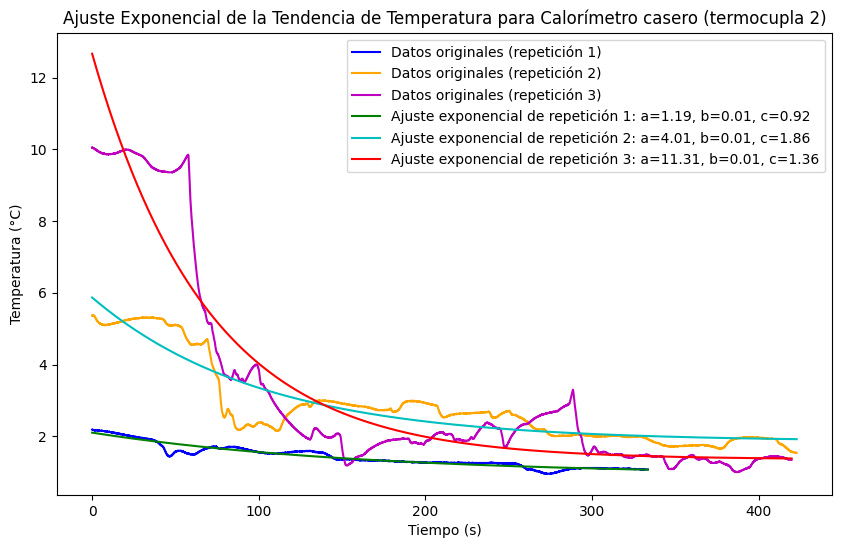

In [183]:
# Calorímetro casero - termocupla 2
# Función exponencial


def monoExp(x, a, b, c):
    return a * np.exp(-b * x) + c

# Ajustar una curva exponencial a los datos

popt_10t2, pcov_10t2 = curve_fit(monoExp, d10['Tiempo'].dropna(), d10['Termocupla_2'].dropna())
popt_11t2, pcov_11t2 = curve_fit(monoExp, d11['Tiempo'].dropna(), d11['Termocupla_2'].dropna())
popt_12t2, pcov_12t2 = curve_fit(monoExp, d12['Tiempo'].dropna(), d12['Termocupla_2'].dropna())

# Generar datos para la curva ajustada
tiempo_fit_10t2 = np.linspace(d10['Tiempo'].min(), d10['Tiempo'].max(), 50000)
tasa_fit_10t2 = monoExp(tiempo_fit_10t2, *popt_10t2)

tiempo_fit_11t2 = np.linspace(d11['Tiempo'].min(), d11['Tiempo'].max(), 500)
tasa_fit_11t2 = monoExp(tiempo_fit_11t2, *popt_11t2)

tiempo_fit_12t2 = np.linspace(d12['Tiempo'].min(), d12['Tiempo'].max(), 500)
tasa_fit_12t2 = monoExp(tiempo_fit_12t2, *popt_12t2)

# Calcular R^2 para cada ajuste
R2_10t2 = calcular_R2(d10['Termocupla_2'].dropna(), monoExp(d10['Tiempo'].dropna(), *popt_10t2))
R2_11t2 = calcular_R2(d11['Termocupla_2'].dropna(), monoExp(d11['Tiempo'].dropna(), *popt_11t2))
R2_12t2 = calcular_R2(d12['Termocupla_2'].dropna(), monoExp(d12['Tiempo'].dropna(), *popt_12t2))


# Graficar los datos y la curva ajustada
plt.figure(figsize=(10, 6))
plt.plot(d10['Tiempo'], d10['Termocupla_2'], 'b-', label='Datos originales (repetición 1)')
plt.plot(d11['Tiempo'], d11['Termocupla_2'], 'orange', label='Datos originales (repetición 2)')
plt.plot(d12['Tiempo'], d12['Termocupla_2'], 'm-', label='Datos originales (repetición 3)')

plt.plot(tiempo_fit_10t2, tasa_fit_10t2, 'g-', label='Ajuste exponencial de repetición 1: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_10t2))
plt.plot(tiempo_fit_11t2, tasa_fit_11t2, 'c-', label='Ajuste exponencial de repetición 2: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_11t2))
plt.plot(tiempo_fit_12t2, tasa_fit_12t2, 'r-', label='Ajuste exponencial de repetición 3: a=%.2f, b=%.2f, c=%.2f' % tuple(popt_12t2))

plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial de la Tendencia de Temperatura para Calorímetro casero (termocupla 2)')
plt.legend()

print(f'Parámetros del ajuste exponencial (repetición 1): a={round(popt_10t2[0],2)}, b={round(popt_10t2[1],2)}, c={round(popt_10t2[2],2)} => T = [{round(popt_10t2[0],2)}*e^(-{round(popt_10t2[1],2)}*t)]+{round(popt_10t2[2],2)} || R^2={R2_10t2:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 2): a={round(popt_11t2[0],2)}, b={round(popt_11t2[1],2)}, c={round(popt_11t2[2],2)} => T = [{round(popt_11t2[0],2)}*e^(-{round(popt_11t2[1],2)}*t)]+{round(popt_11t2[2],2)} || R^2={R2_11t2:.4f}')
print(f'Parámetros del ajuste exponencial (repetición 3): a={round(popt_12t2[0],2)}, b={round(popt_12t2[1],2)}, c={round(popt_12t2[2],2)} => T = [{round(popt_12t2[0],2)}*e^(-{round(popt_12t2[1],2)}*t)]+{round(popt_12t2[2],2)} || R^2={R2_12t2:.4f}')
print()

print(f'Parámetros del ajuste exponencial promedios: a={round((popt_10t2[0]+popt_11t2[0]+popt_12t2[0])/3,2)}, b={round((popt_10t2[1]+popt_11t2[1]+popt_12t2[1])/3,2)}, c={round((popt_10t2[2]+popt_11t2[2]+popt_12t2[2])/3,2)}')
print()
plt.show()

Combinación de cada conjunto de datos a través de una promediación entre estos con ayuda de una interpolación lineal para partes faltantes para cada calorímetro respectivo

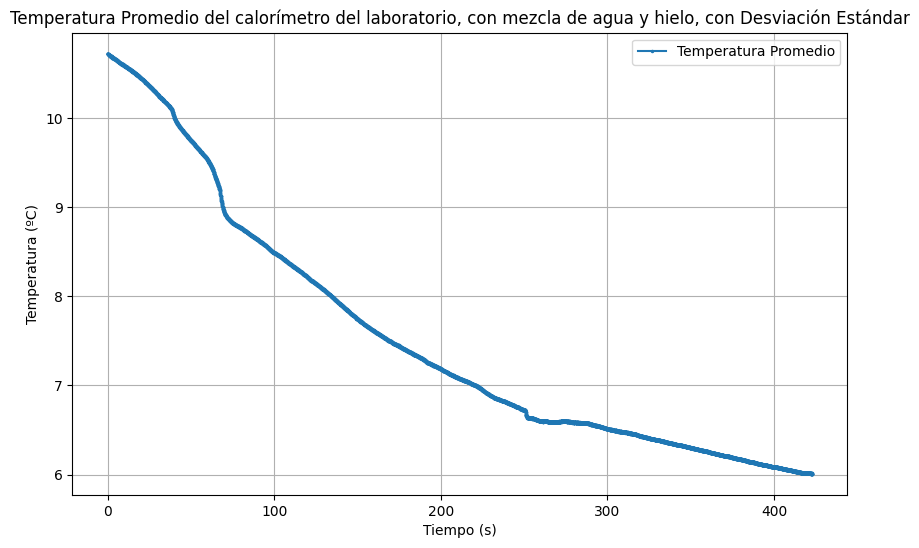

In [200]:
# Combinación de datos del calorímetro del laboratorio

# Crear una referencia de tiempo común usando la intersección de los rangos de tiempo de cada DataFrame
tiempo_comun = pd.Series(sorted(set(d10['Tiempo']).union(set(d11['Tiempo'])).union(set(d12['Tiempo']))))

# Interpolación para alinear los datos
d10_interp = d10.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d11_interp = d11.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d12_interp = d12.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()

# Crear un DataFrame para las mediciones promedio
df_combinadot1 = pd.DataFrame()

# Asignar la columna 'Tiempo'
df_combinadot1['Tiempo'] = tiempo_comun

# Calcular el promedio de las columnas de temperatura
df_combinadot1['Temperatura_Promedio'] = (d10_interp['Termocupla_1'] + d11_interp['Termocupla_1'] + d12_interp['Termocupla_1']) / 3

# Calcular la desviación estándar de las mediciones
df_combinadot1['Desviacion_Estandar'] = pd.concat([d10_interp['Termocupla_1'], d11_interp['Termocupla_1'], d12_interp['Termocupla_1']], axis=1).std(axis=1)

# Calcular el error estándar de las mediciones
df_combinadot1['Error_Estandar'] = df_combinadot1['Desviacion_Estandar'] / (3 ** 0.5)


plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar la temperatura promedio
plt.plot(df_combinadot1['Tiempo'], df_combinadot1['Temperatura_Promedio'], label='Temperatura Promedio', marker='o', linestyle='-', markersize=1.5)

# Graficar la desviación estándar como barras de error
#plt.errorbar(df_combinadot1['Tiempo'], df_combinadot1['Temperatura_Promedio'], yerr=df_combinadot1['Desviacion_Estandar'], fmt='none', capsize=5, label='Desviación Estándar')

# Configurar etiquetas y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura Promedio del calorímetro del laboratorio, con mezcla de agua y hielo, con Desviación Estándar')
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.grid(True)  # Mostrar cuadrícula
plt.show()

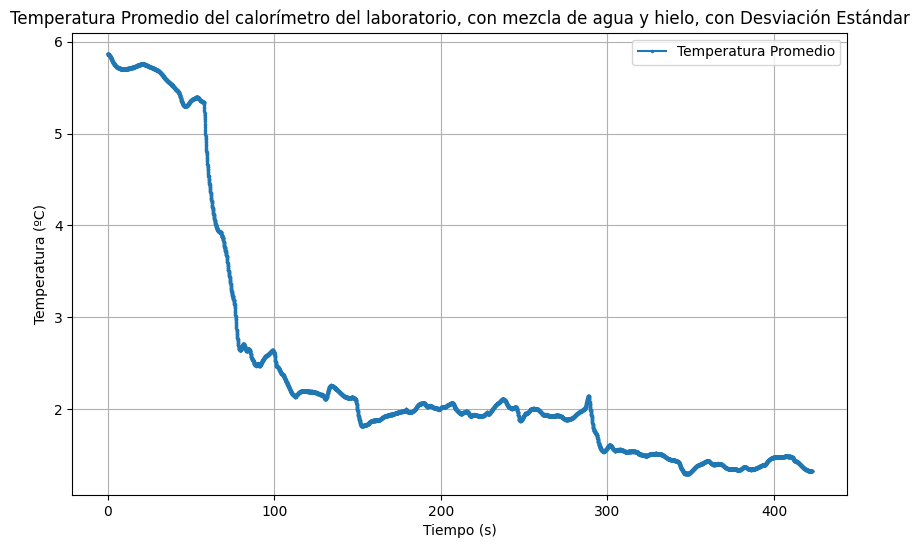

In [201]:
# Combinación de datos del calorímetro del laboratorio

# Crear una referencia de tiempo común usando la intersección de los rangos de tiempo de cada DataFrame
tiempo_comun = pd.Series(sorted(set(d10['Tiempo']).union(set(d11['Tiempo'])).union(set(d12['Tiempo']))))

# Interpolación para alinear los datos
d10_interp = d10.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d11_interp = d11.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d12_interp = d12.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()

# Crear un DataFrame para las mediciones promedio
df_combinadot2 = pd.DataFrame()

# Asignar la columna 'Tiempo'
df_combinadot2['Tiempo'] = tiempo_comun

# Calcular el promedio de las columnas de temperatura
df_combinadot2['Temperatura_Promedio'] = (d10_interp['Termocupla_2'] + d11_interp['Termocupla_2'] + d12_interp['Termocupla_2']) / 3

# Calcular la desviación estándar de las mediciones
df_combinadot2['Desviacion_Estandar'] = pd.concat([d10_interp['Termocupla_2'], d11_interp['Termocupla_2'], d12_interp['Termocupla_2']], axis=1).std(axis=1)

# Calcular el error estándar de las mediciones
df_combinadot2['Error_Estandar'] = df_combinadot2['Desviacion_Estandar'] / (3 ** 0.5)


plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar la temperatura promedio
plt.plot(df_combinadot2['Tiempo'], df_combinadot2['Temperatura_Promedio'], label='Temperatura Promedio', marker='o', linestyle='-', markersize=1.5)

# Graficar la desviación estándar como barras de error
#plt.errorbar(df_combinadot1['Tiempo'], df_combinadot1['Temperatura_Promedio'], yerr=df_combinadot1['Desviacion_Estandar'], fmt='none', capsize=5, label='Desviación Estándar')

# Configurar etiquetas y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura Promedio del calorímetro del laboratorio, con mezcla de agua y hielo, con Desviación Estándar')
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.grid(True)  # Mostrar cuadrícula
plt.show()

Prueba Pearson de correlación de datos de temperatura entre los calorímetros de laboratorio y casero

In [204]:
corr_coef, p_value = stats.pearsonr(df_combinadot1['Temperatura_Promedio'], df_combinadot2['Temperatura_Promedio'])

# Mostrar resultados
print(f"Coeficiente de correlación de Pearson: {corr_coef}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < alpha:
    print("Existe una correlación significativa entre los datos.")
else:
    print("No hay suficiente evidencia para afirmar una correlación significativa entre los datos.")

Coeficiente de correlación de Pearson: 0.933067027058134
Valor p: 0.0
Existe una correlación significativa entre los datos.
